In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder

import plotly.graph_objs as go
import plotly.express as px

In [4]:
df = pd.read_csv('C:\\Users\\elect\\Desktop\\ds_cars_proj\\Transformed_data\\Cleaned_data.csv')

In [5]:
df

Car Model         Condition  \
0                                      2023 BMW M2 Base              Used   
1                                2020 Dodge Charger SXT              Used   
2                                    2016 Scion iM Base              Used   
3     2022 Volvo XC60 Recharge Plug-In Hybrid T8 Ins...              Used   
4                             2012 Mitsubishi Lancer SE              Used   
...                                                 ...               ...   
9317                    2020 Nissan Maxima 3.5 Platinum  Nissan Certified   
9318         2025 Mercedes-Benz Sprinter 2500 High Roof               New   
9319                         2025 Lexus RX 450h+ Luxury               New   
9320             2024 Volkswagen Tiguan 2.0T SE 4MOTION              Used   
9321                          2025 Ford Escape Platinum               New   

     Mileage  Price (USD)  Monthly Payment  \
0       2496      63000.0           1184.0   
1      98302      14995.0            282.0   
2      72040      12690.0            239.0   
3      31580      38998.0            733.0   
4      54197       9995.0            188.0   
...      ...          ...              ...   
9317   68010      23500.0            442.0   
9318     NaN      64356.0           1210.0   
9319     NaN      77254.0           1452.0   
9320    9639      26769.0            503.0   
9321     NaN      38373.0            721.0   

                              Dealer Name  Year          brand  Mileage_mi  \
0                 Murgado Ford of Chicago  2023            BMW      2496.0   
1     Blue Sky Auto Sales - Brighton Park  2020          Dodge     98302.0   
2                 Mcgrath Evanston Subaru  2016          Scion     72040.0   
3                       CarMax Birmingham  2022          Volvo     31580.0   
4                          Moto Zone Inc.  2012     Mitsubishi     54197.0   
...                                   ...   ...            ...         ...   
9317                      Glendale Nissan  2020         Nissan     68010.0   
9318     Mercedes-Benz of Hoffman Estates  2025  Mercedes-Benz         NaN   
9319                   Lexus of Arlington  2025          Lexus         NaN   
9320                       Bill Jacobs VW  2024     Volkswagen      9639.0   
9321                       Fair Oaks Ford  2025           Ford         NaN   

     Condition_car  
0             Used  
1             Used  
2             Used  
3             Used  
4             Used  
...            ...  
9317     Certified  
9318           New  
9319           New  
9320          Used  
9321           New  

[9322 rows x 10 columns]

## Descriptive & Univariate Analysis 

# Price distribution

<Axes: xlabel='Price (USD)'>

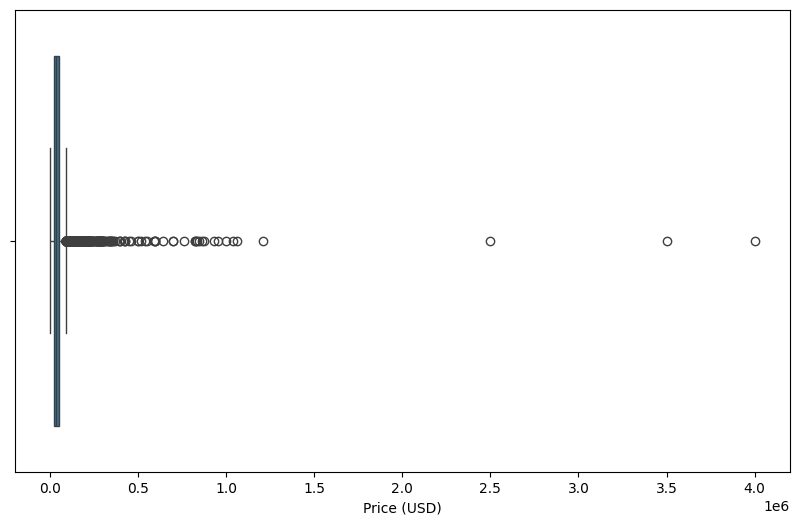

In [352]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price (USD)'])

Price Distribution by brand

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\1555756798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["brand"].values, y = df["Price (USD)"].values,palette="twilight",ax=ax)


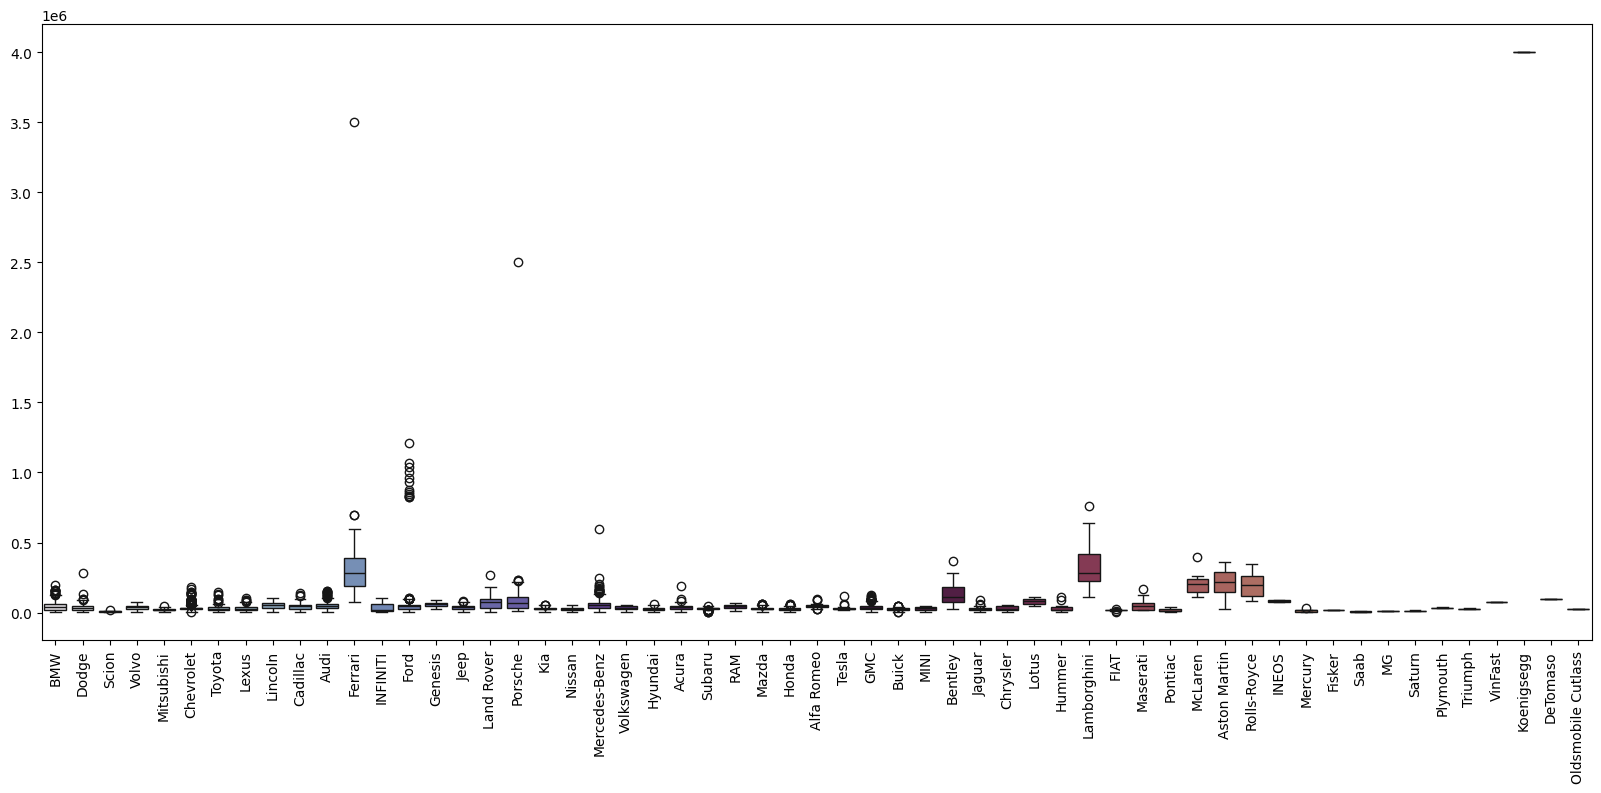

In [353]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["brand"].values, y = df["Price (USD)"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

# Insights :
There are numerous outliers in the dataset, primarily driven by the presence of highly expensive cars. When analyzing by brand, Chevrolet, Ford, Toyota, Audi, Mercedes-Benz, and GMC are the brands with the most significant number of outliers.

# Car Condition Distribution

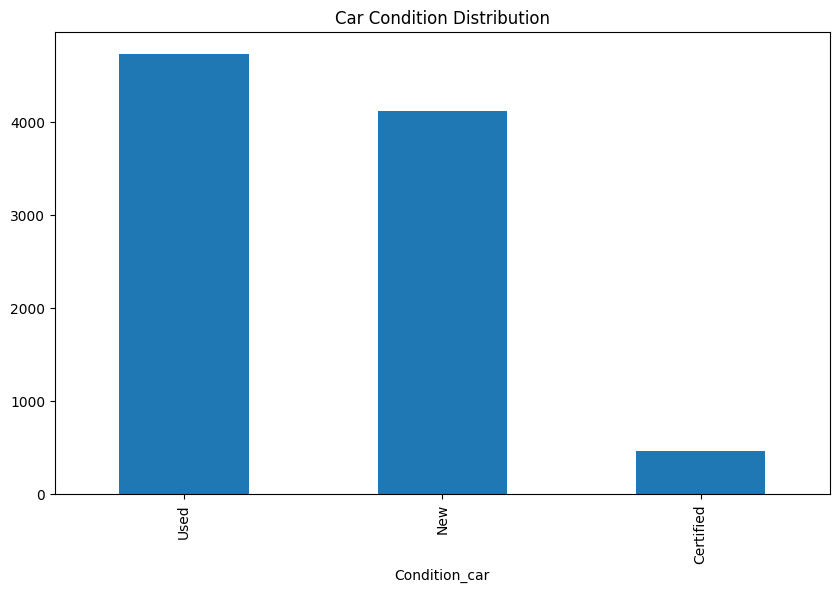

In [329]:
plt.figure(figsize=(10, 6))
condition_counts = df['Condition_car'].value_counts()
condition_counts.plot(kind='bar', title='Car Condition Distribution')
plt.show()

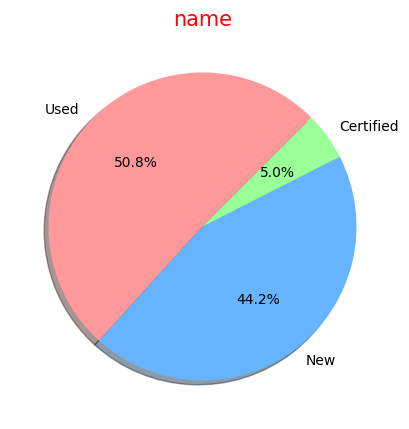

In [356]:
labels = df["Condition_car"].value_counts().index
sizes = df["Condition_car"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('name',color = 'red',fontsize = 15)
plt.show()

# Insights : 
Used cars account for the majority of sales on the cars.com website, representing 55.8%, followed by new cars at 44.2%. Additionally, 8.9% of used cars are certified, indicating their excellent condition. 

# Most Popular Brands

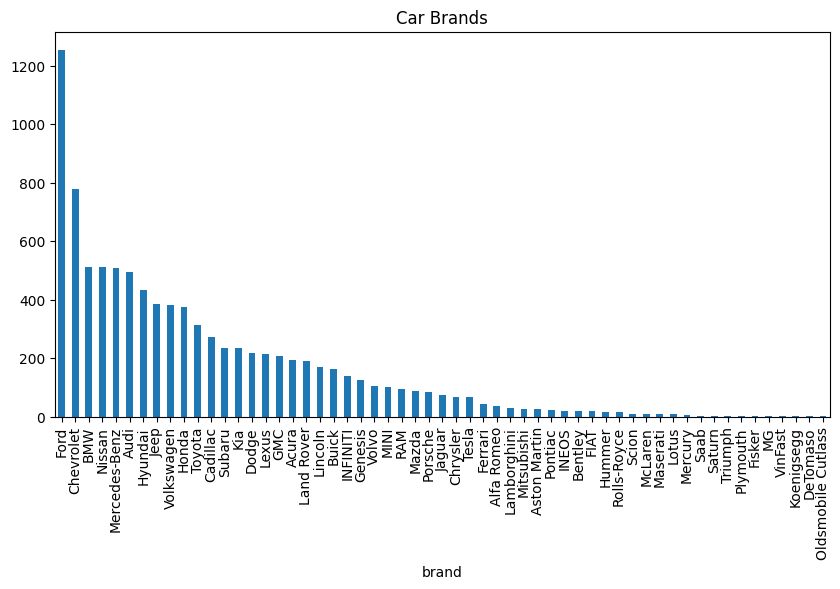

In [330]:
Different_brands = df['brand'].value_counts()
Different_brands.plot(kind='bar', title='Car Brands', figsize=(10, 5))
plt.show()

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\2610156422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['brand'], palette="CMRmap")


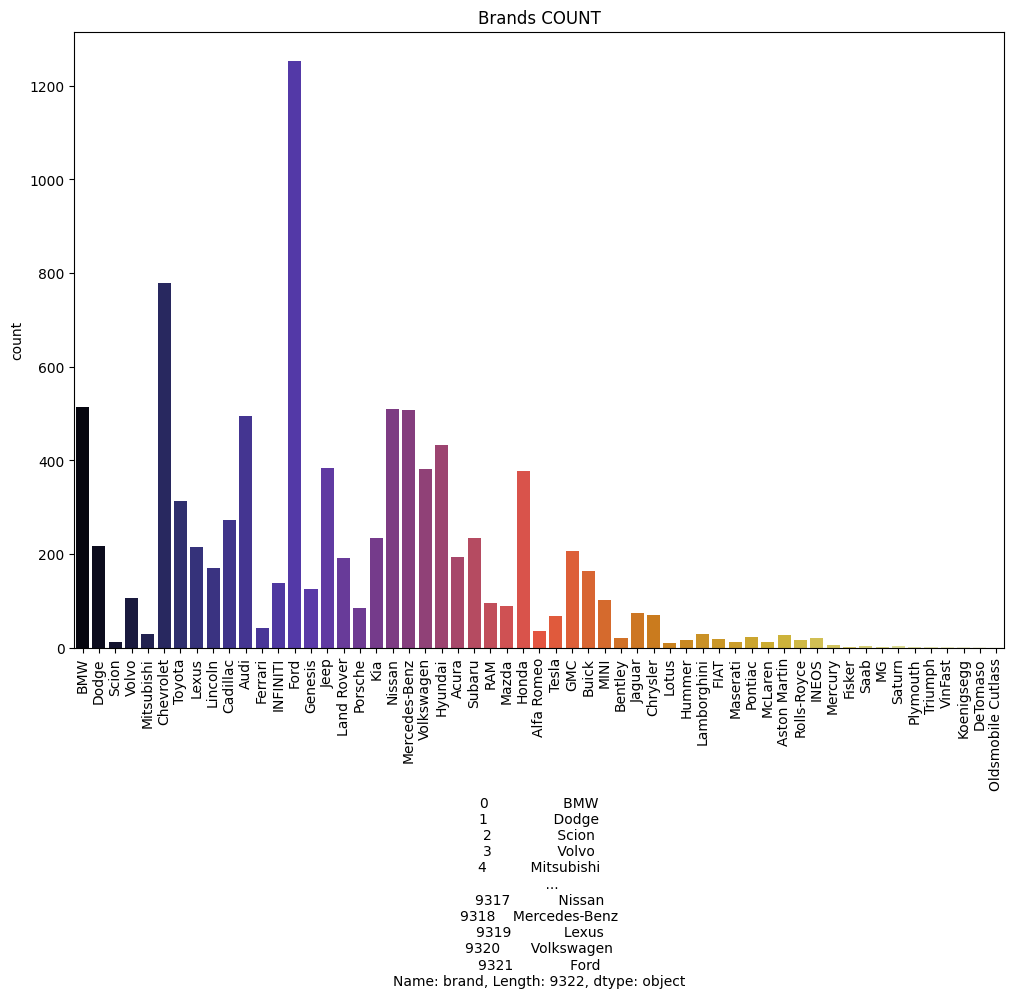

In [357]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x=df['brand'], palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel(df['brand'], fontsize=10, color="black")
plt.ylabel("count", fontsize=10, color="black")
plt.title("Brands COUNT", color="black")
plt.show()

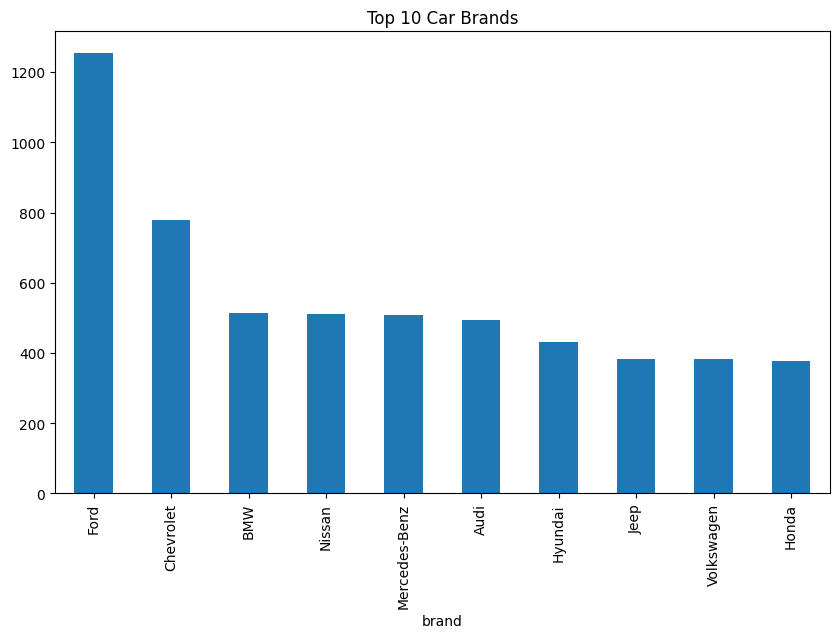

In [419]:
plt.figure(figsize=(10, 6))
popular_brands = df['brand'].value_counts().head(10)
popular_brands.plot(kind='bar', title='Top 10 Car Brands')
plt.show()

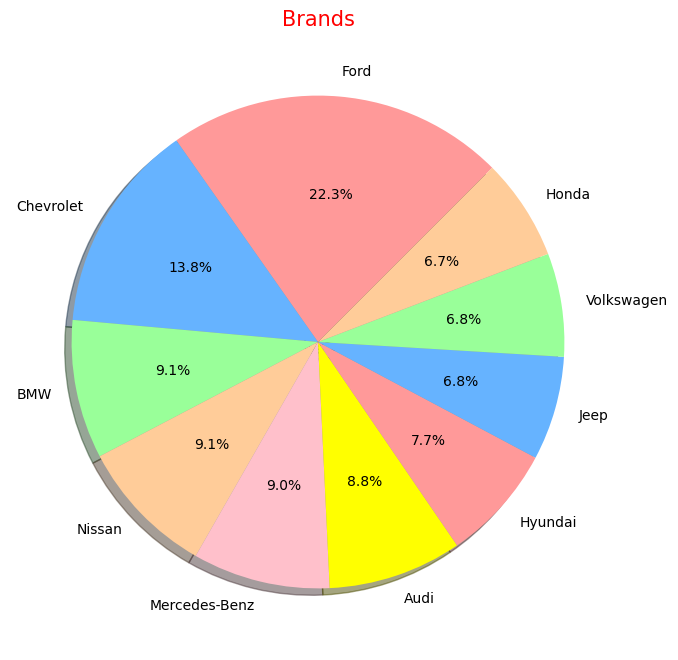

In [420]:
labels = df["brand"].value_counts().head(10).index
sizes = df["brand"].value_counts().head(10)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Brands',color = 'red',fontsize = 15)
plt.show()

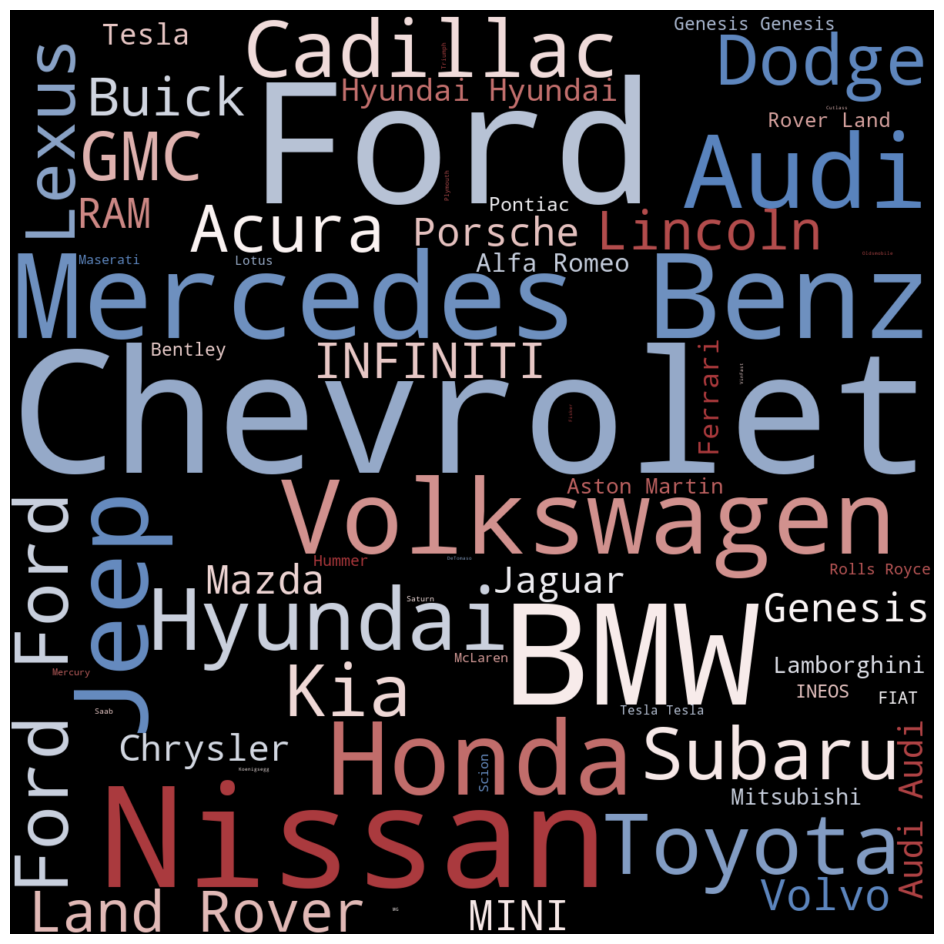

In [362]:
text = ' '.join(df['brand'])

plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color='black', colormap='vlag', width=1200, height=1200, max_words=121, max_font_size=300).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Distribution of Cars by Year of Production

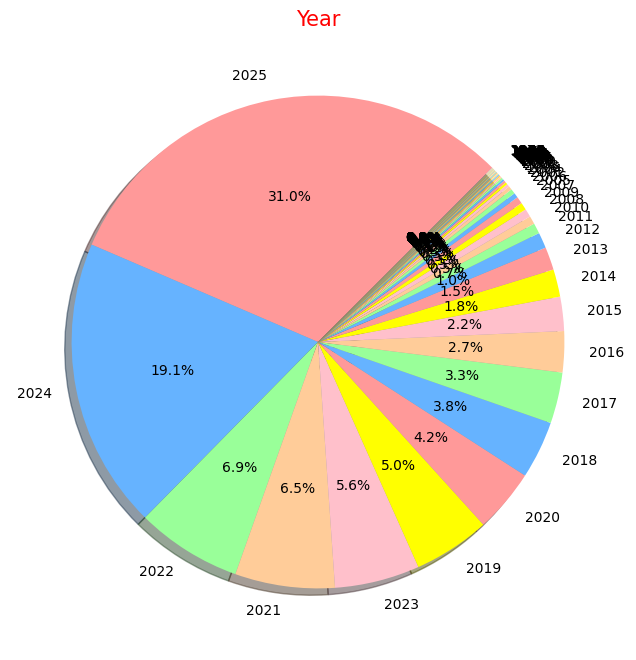

In [363]:
labels = df["Year"].value_counts().index
sizes = df["Year"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Year',color = 'red',fontsize = 15)
plt.show()

# Insights :
New cars dominate sales, indicating a strong preference for modern vehicles.  
**Customer Trend:** Buyers are drawn to the latest technology, features, and designs.

Mileage Distribution

<Axes: >

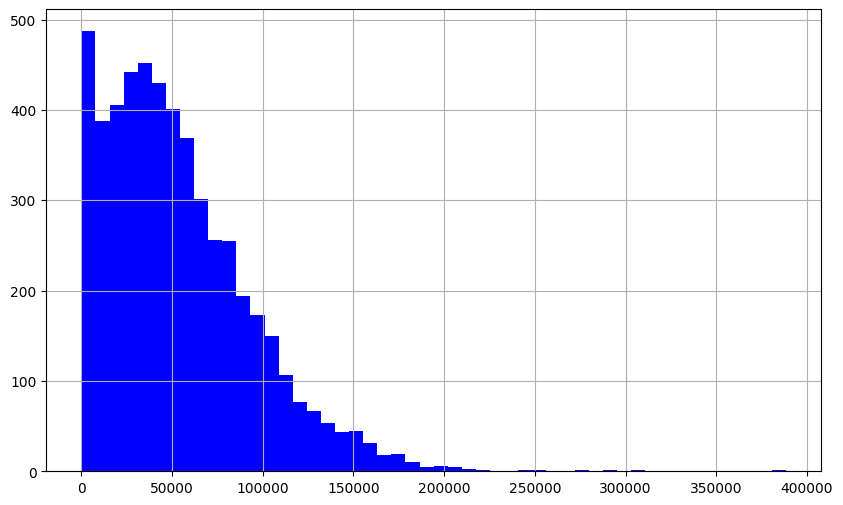

In [364]:
plt.figure(figsize=(10, 6))
df['Mileage_mi'].hist(color='blue',bins=50)

Price(USD) vs.Mileage(mile)

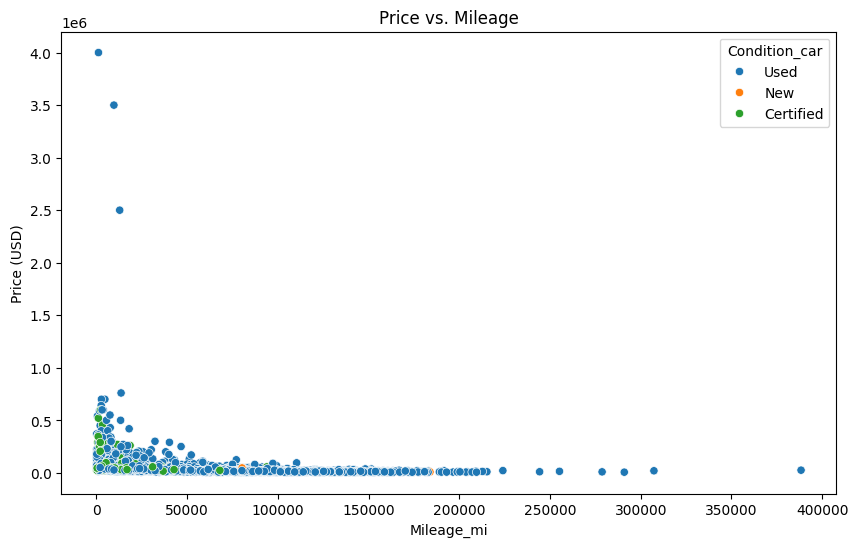

In [365]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage_mi', y='Price (USD)', hue='Condition_car')
plt.title('Price vs. Mileage')
plt.show()

# Insights : 
The higher the mileage, the lower the price.

## Analysis by Brand
The following result is not satisfying, then I should analyze the data by each brand.

In [383]:
df['Mileage_mi'].corr(df['Price (USD)'])

np.float64(-0.2018122964927216)

## To have more effecient and effective analysis, I'm gonna study my dataset by brand.

In [391]:
df.loc[df['Mileage_mi'].isnull(), 'Mileage_mi'] = 0

In [392]:
# Create a dictionary where each key is a brand, and the value is a DataFrame
brand_dataframes = {brand: df[df['brand'] == brand] for brand in df['brand'].unique()}

Price(USD) vs. Brand

In [393]:
avg_price_by_brand = df.groupby('brand')['Price (USD)'].mean().sort_values(ascending=False)
print(avg_price_by_brand)


brand
Koenigsegg            3.999900e+06
Ferrari               3.800128e+05
Lamborghini           3.340401e+05
Aston Martin          2.106403e+05
McLaren               2.088988e+05
Rolls-Royce           1.934594e+05
Bentley               1.402190e+05
Porsche               1.057650e+05
DeTomaso              9.999500e+04
INEOS                 8.226238e+04
Lotus                 7.958510e+04
VinFast               7.512500e+04
Land Rover            7.337153e+04
Maserati              5.776255e+04
Mercedes-Benz         5.623414e+04
Genesis               5.564112e+04
Lincoln               5.252379e+04
Ford                  5.201360e+04
Alfa Romeo            4.956237e+04
BMW                   4.757320e+04
Audi                  4.714347e+04
Cadillac              4.368796e+04
RAM                   4.247351e+04
GMC                   4.014666e+04
Acura                 3.851403e+04
Volvo                 3.757327e+04
Jeep                  3.598520e+04
Dodge                 3.516882e+04
Plymouth      

In [401]:
# Calculate the correlation between 'Mileage' and 'Price (USD)' for each brand
correlation_list={}
for brand, brand_dataframe in brand_dataframes.items():
    correlation = brand_dataframe['Mileage_mi'].corr(brand_dataframe['Price (USD)'])
    print(f"Correlation between Mileage (Mile) and Price (USD) for {brand}: {correlation}")
    correlation_list[brand] = correlation

sorted_correlations = sorted(correlation_list.values())

for brand, correlation in sorted(correlation_list.items(), key=lambda item: item[1]):
    print(f"{brand}: {correlation}")

Correlation between Mileage (Mile) and Price (USD) for BMW: -0.6911096918707372
Correlation between Mileage (Mile) and Price (USD) for Dodge: -0.6227617113819933
Correlation between Mileage (Mile) and Price (USD) for Scion: -0.5527283336726526
Correlation between Mileage (Mile) and Price (USD) for Volvo: -0.8392498041360037
Correlation between Mileage (Mile) and Price (USD) for Mitsubishi: -0.40990216954359826
Correlation between Mileage (Mile) and Price (USD) for Chevrolet: -0.39621438773204554
Correlation between Mileage (Mile) and Price (USD) for Toyota: -0.5372571643341179
Correlation between Mileage (Mile) and Price (USD) for Lexus: -0.7622216282440484
Correlation between Mileage (Mile) and Price (USD) for Lincoln: -0.7814178572768623
Correlation between Mileage (Mile) and Price (USD) for Cadillac: -0.6452003340115062
Correlation between Mileage (Mile) and Price (USD) for Audi: -0.6729632333971441
Correlation between Mileage (Mile) and Price (USD) for Ferrari: -0.19525767043910824

Price(USD) vs.Monthly Payment

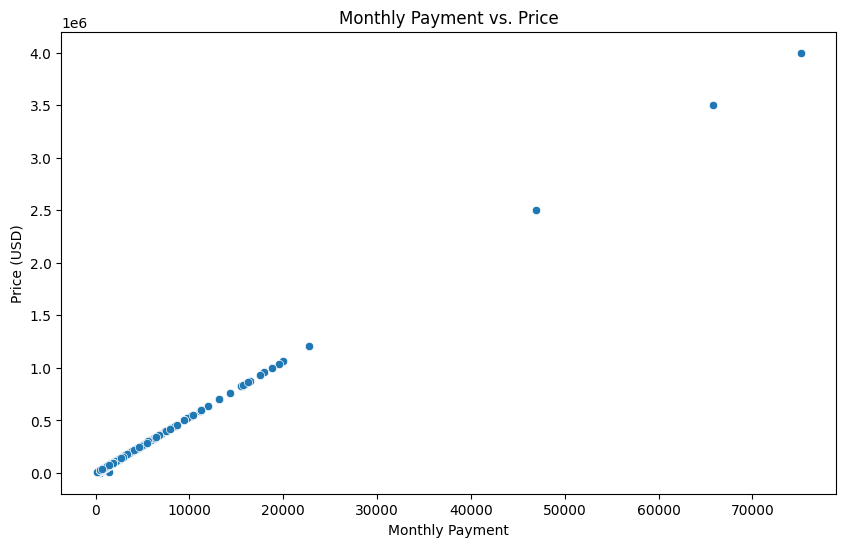

In [403]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Monthly Payment', y='Price (USD)')
plt.title('Monthly Payment vs. Price')
plt.show()

# Insights : 
The monthly payment is directly proportional to the overall price.

# Number of cars per dealer name

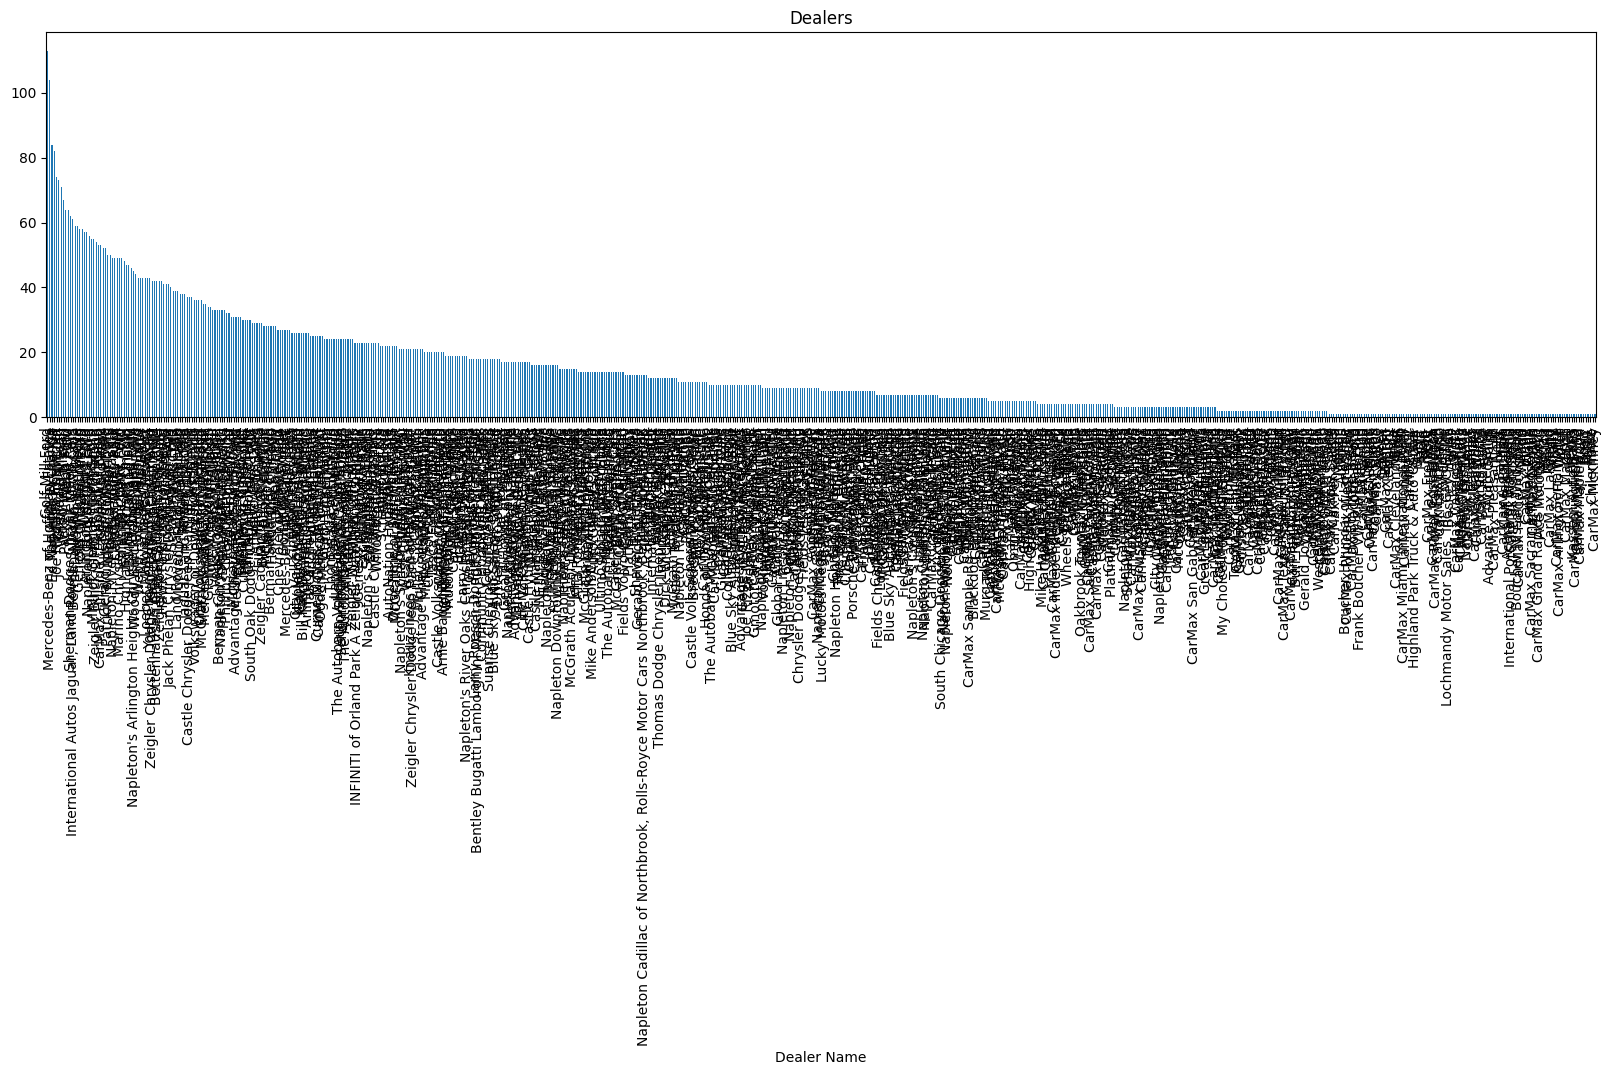

In [405]:
plt.figure(figsize=(10, 6))
dealer_counts = df['Dealer Name'].value_counts()
dealer_counts.plot(kind='bar', title='Dealers', figsize=(20, 5))
plt.show()


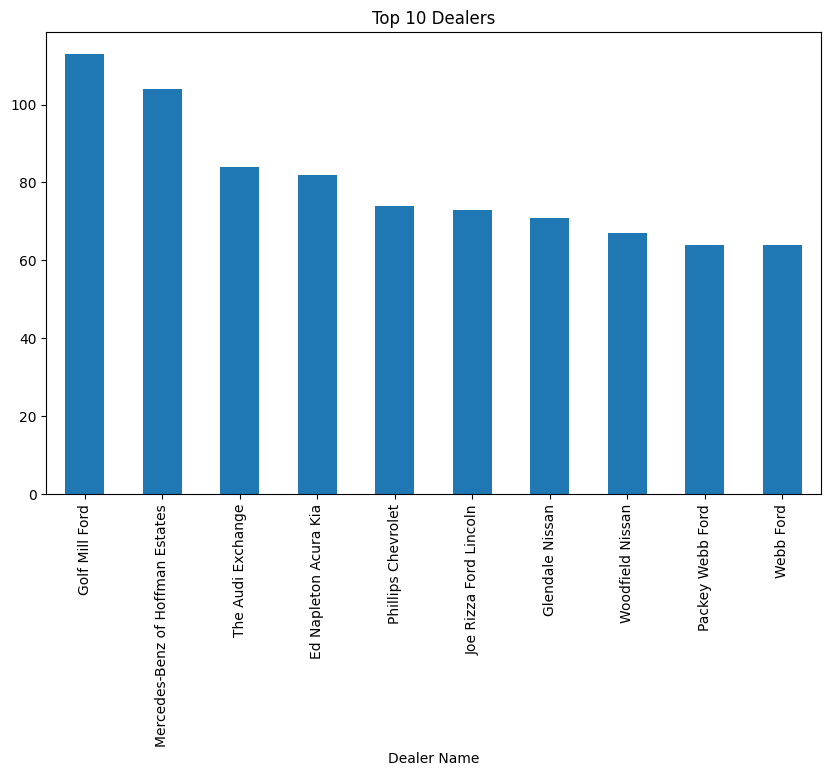

In [418]:
plt.figure(figsize=(10, 6))
top_dealers = df['Dealer Name'].value_counts().head(10)
top_dealers.plot(kind='bar', title='Top 10 Dealers')
plt.show()


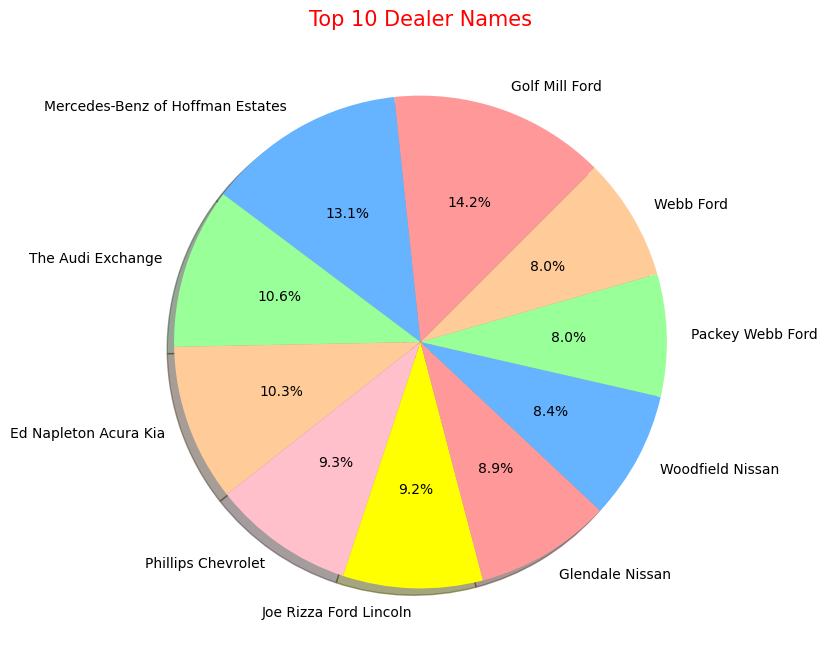

In [424]:
labels = df["Dealer Name"].value_counts().head(10).index
sizes = df["Dealer Name"].value_counts().head(10)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Top 10 Dealer Names',color = 'red',fontsize = 15)
plt.show()

# Insghits:
The data indicates the market is dominated by a few major players, with the top 4 dealers (*Golf Mill Ford*, *Mercedes-Benz of Hoffman Estates*, *The Audi Exchange* and *Ed Napleton Acura* ) accounting for over 40% of the sales. The remaining dealers have more moderate shares.

In [436]:
# Calculate the correlation between 'Mileage' and 'Price (USD)' for each dealer
correlation_list = {}
for dealer, dealer_dataframe in df.groupby('Dealer Name'):
    correlation = dealer_dataframe['Mileage_mi'].corr(dealer_dataframe['Price (USD)'])
    print(f"Correlation between Mileage (Mile) and Price (USD) for {dealer}: {correlation}")
    correlation_list[dealer] = correlation

sorted_correlations = sorted(correlation_list.items(), key=lambda item: item[1])

for dealer, correlation in sorted_correlations:
    print(f"{dealer}: {correlation}")

Correlation between Mileage (Mile) and Price (USD) for 94 Nissan Of South Holland: -0.21292676033403393
Correlation between Mileage (Mile) and Price (USD) for A: nan
Correlation between Mileage (Mile) and Price (USD) for ACL Sales & Leasing: 1.0
Correlation between Mileage (Mile) and Price (USD) for Access Automotive: -0.6409172759293466
Correlation between Mileage (Mile) and Price (USD) for Ace Motorworks: nan
Correlation between Mileage (Mile) and Price (USD) for Acura Highland Park: -0.020598450158944223
Correlation between Mileage (Mile) and Price (USD) for Acura of Brookfield: nan
Correlation between Mileage (Mile) and Price (USD) for Adam Auto Group: -0.3651915498645511
Correlation between Mileage (Mile) and Price (USD) for Adrian: nan
Correlation between Mileage (Mile) and Price (USD) for Advance 1 Auto Group: nan
Correlation between Mileage (Mile) and Price (USD) for Advantage Acura of Naperville: -0.6375731894425949
Correlation between Mileage (Mile) and Price (USD) for Advant

c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Price Distribution by Car Age

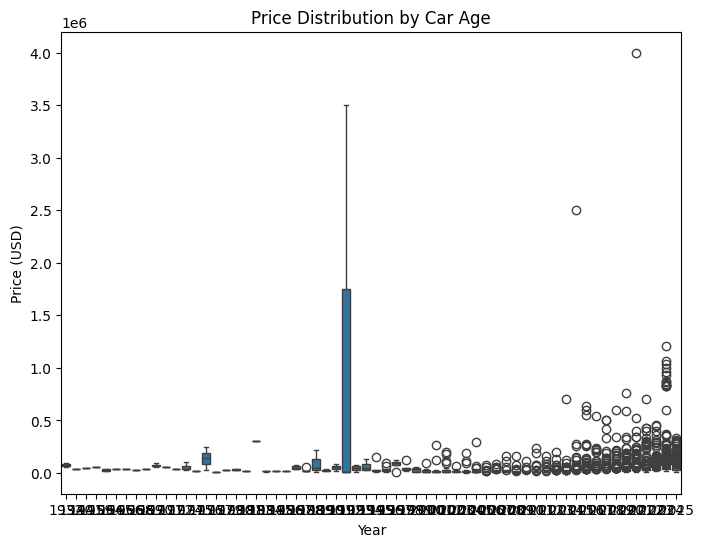

In [442]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Year', y='Price (USD)')
plt.title('Price Distribution by Car Age')
plt.show()

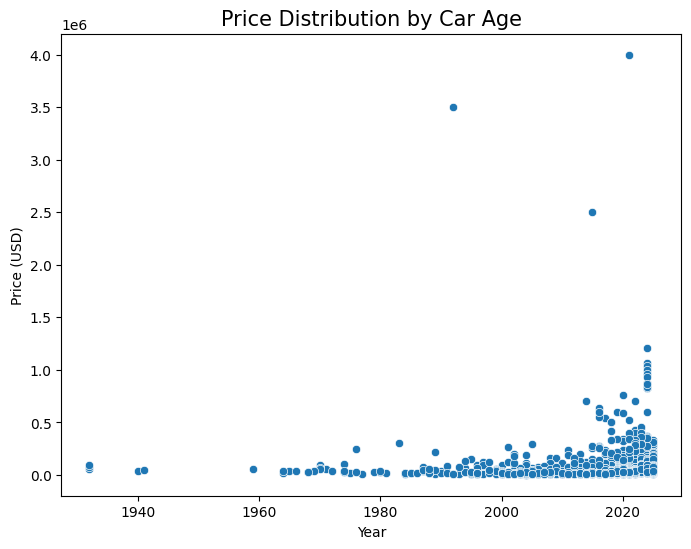

In [444]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Year', y='Price (USD)')
plt.title('Price Distribution by Car Age', fontsize=15)
plt.show()

In [451]:
correlation_dict = {}
for Year, Year_dataframe in df.groupby('Year'):
    correlation = Year_dataframe['Mileage_mi'].corr(Year_dataframe['Price (USD)'])
    print(f"Correlation between Mileage (Mile) and Price (USD) for {Year}: {correlation}")
    correlation_dict[Year] = correlation

sorted_correlations = sorted(correlation_dict.items(), key=lambda item: item[1])

for Year, correlation in sorted_correlations:
    print(f"{Year}: {correlation}")

Correlation between Mileage (Mile) and Price (USD) for 1932: -0.8587288808721663
Correlation between Mileage (Mile) and Price (USD) for 1940: nan
Correlation between Mileage (Mile) and Price (USD) for 1941: nan
Correlation between Mileage (Mile) and Price (USD) for 1959: nan
Correlation between Mileage (Mile) and Price (USD) for 1964: 1.0
Correlation between Mileage (Mile) and Price (USD) for 1965: nan
Correlation between Mileage (Mile) and Price (USD) for 1966: nan
Correlation between Mileage (Mile) and Price (USD) for 1968: 1.0
Correlation between Mileage (Mile) and Price (USD) for 1969: nan
Correlation between Mileage (Mile) and Price (USD) for 1970: -0.8309671363250949
Correlation between Mileage (Mile) and Price (USD) for 1971: nan
Correlation between Mileage (Mile) and Price (USD) for 1972: nan
Correlation between Mileage (Mile) and Price (USD) for 1974: 0.6007652638076393
Correlation between Mileage (Mile) and Price (USD) for 1975: nan
Correlation between Mileage (Mile) and Pric

c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


# Car's Condition vs Price (USD)

In [455]:
# Encode the 'Condition_car' column to numeric values
le = LabelEncoder()
df['Condition_car_encoded'] = le.fit_transform(df['Condition_car'])

# Calculate the Spearman correlation between the encoded 'Condition_car' and 'Price (USD)'
correlation = df['Condition_car_encoded'].corr(df['Price (USD)'], method='spearman')
print(f"Spearman correlation between Condition_car and Price (USD): {correlation}")

Spearman correlation between Condition_car and Price (USD): -0.5056739594929226


In [456]:
df.head(4)

Car Model Condition Mileage  \
0                                   2023 BMW M2 Base      Used    2496   
1                             2020 Dodge Charger SXT      Used   98302   
2                                 2016 Scion iM Base      Used   72040   
3  2022 Volvo XC60 Recharge Plug-In Hybrid T8 Ins...      Used   31580   

   Price (USD)  Monthly Payment                          Dealer Name  Year  \
0      63000.0           1184.0              Murgado Ford of Chicago  2023   
1      14995.0            282.0  Blue Sky Auto Sales - Brighton Park  2020   
2      12690.0            239.0              Mcgrath Evanston Subaru  2016   
3      38998.0            733.0                    CarMax Birmingham  2022   

   brand  Mileage_mi Condition_car  brand_encoded  Condition_car_encoded  
0    BMW      2496.0          Used              4                      2  
1  Dodge     98302.0          Used             11                      2  
2  Scion     72040.0          Used             49                      2  
3  Volvo     31580.0          Used             56                      2

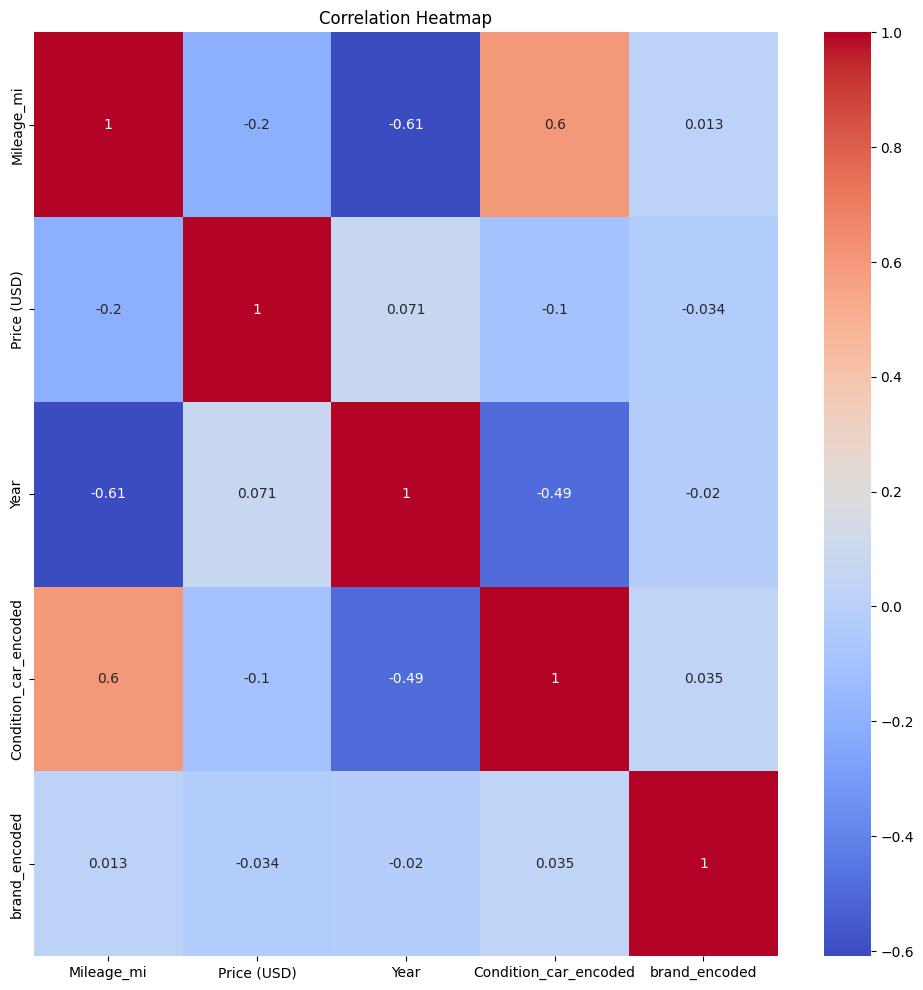

In [459]:
df['Year'].astype(float)
numeric_cols = ['Mileage_mi', 'Price (USD)', 'Year', 'Condition_car_encoded','brand_encoded']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## It seems that studying correlations by brand appears to be necessary for a deeper analysis.

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


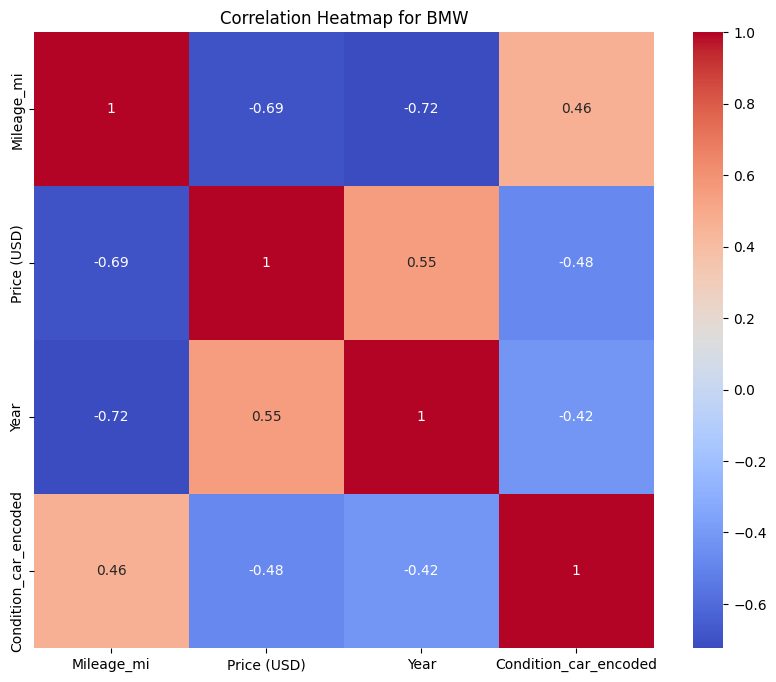

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


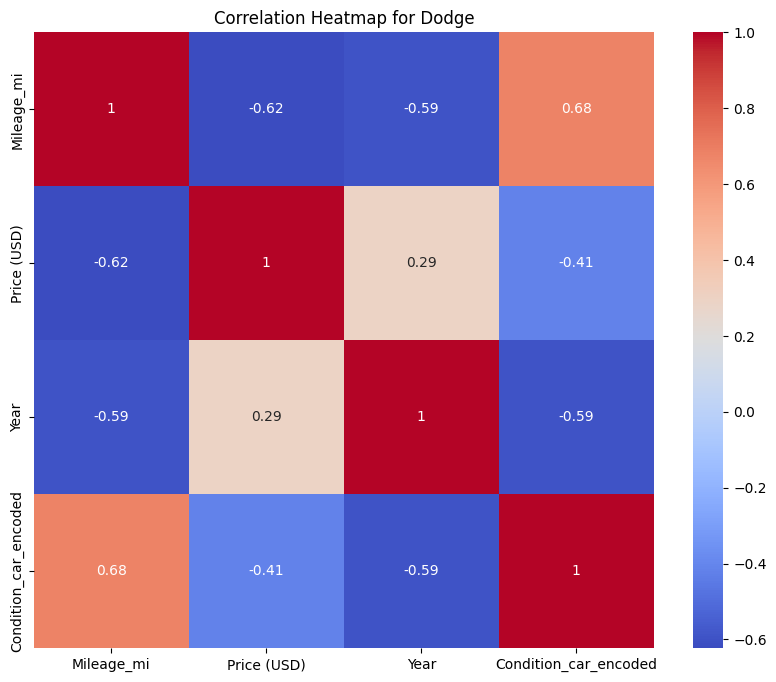

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


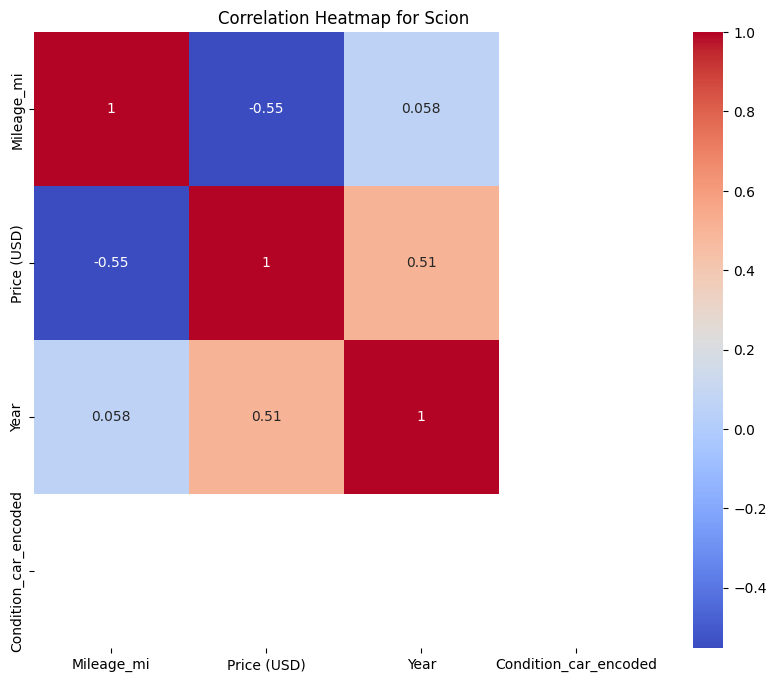

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


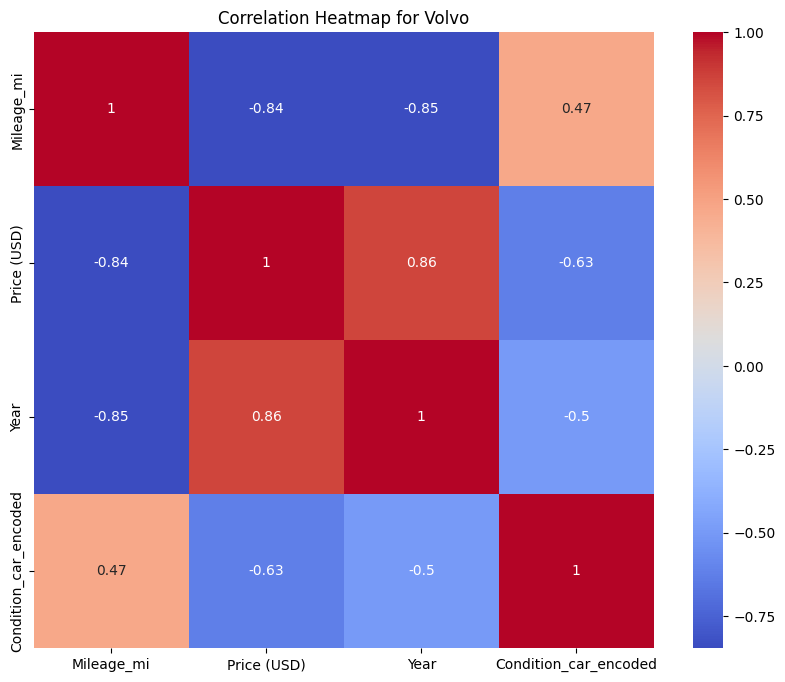

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


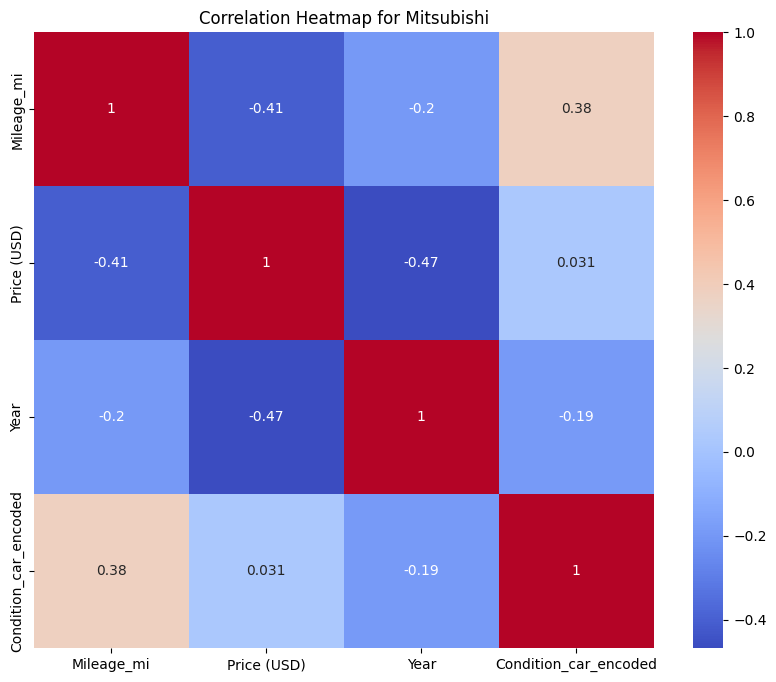

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


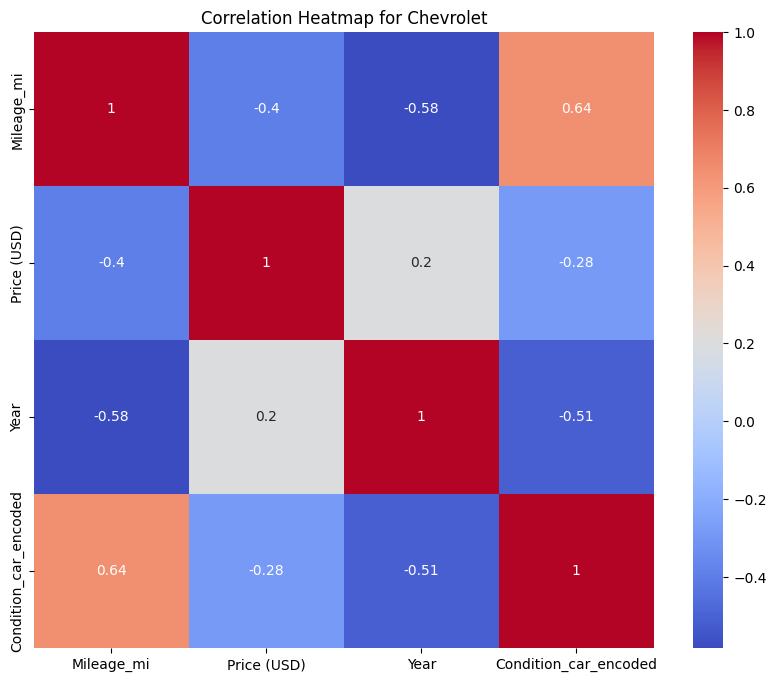

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


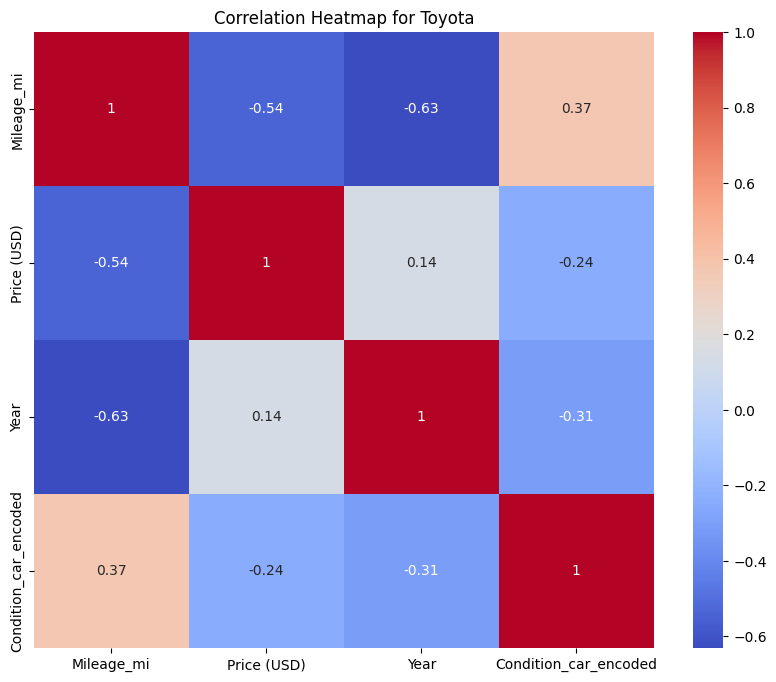

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


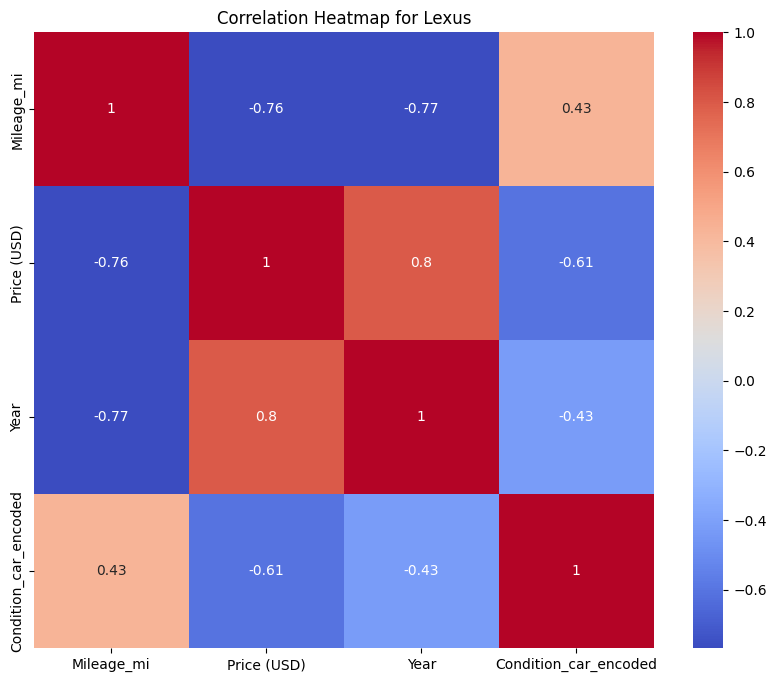

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


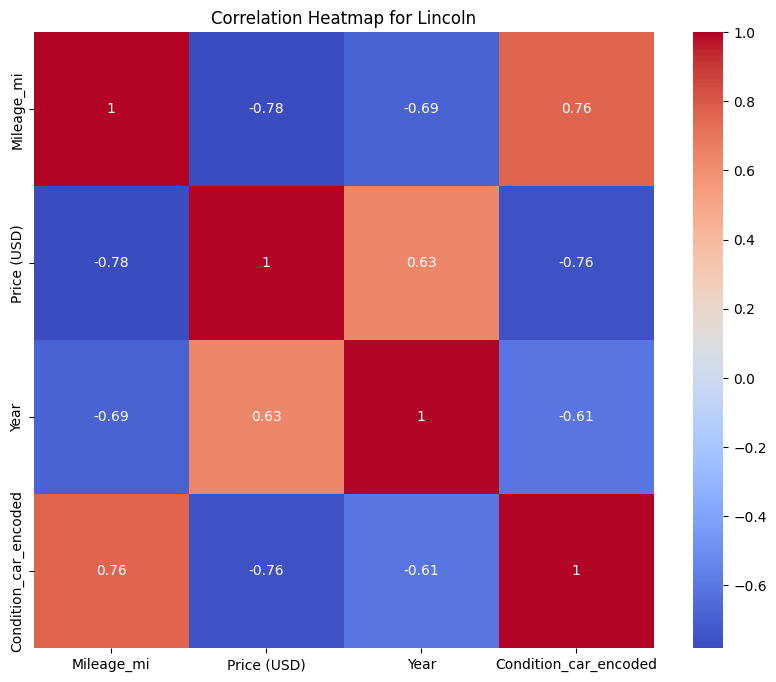

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


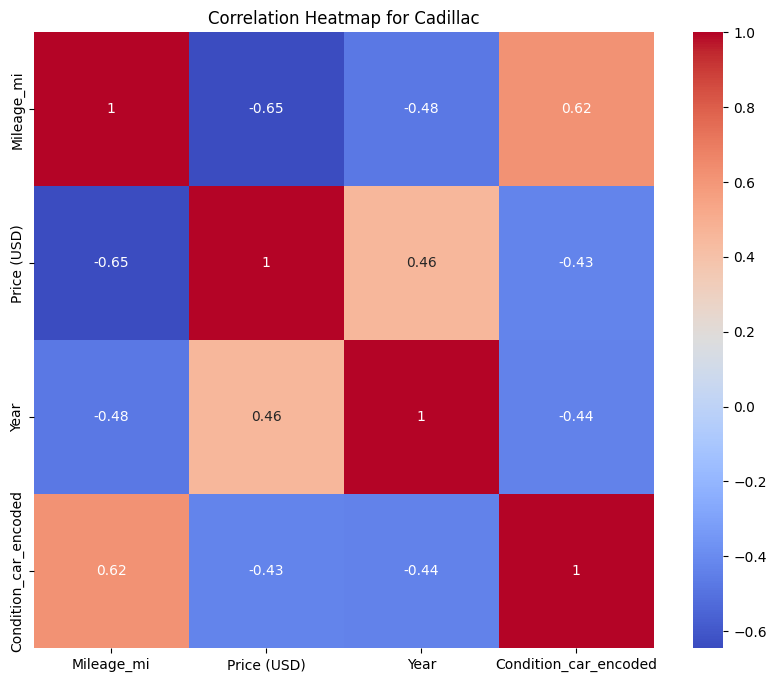

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


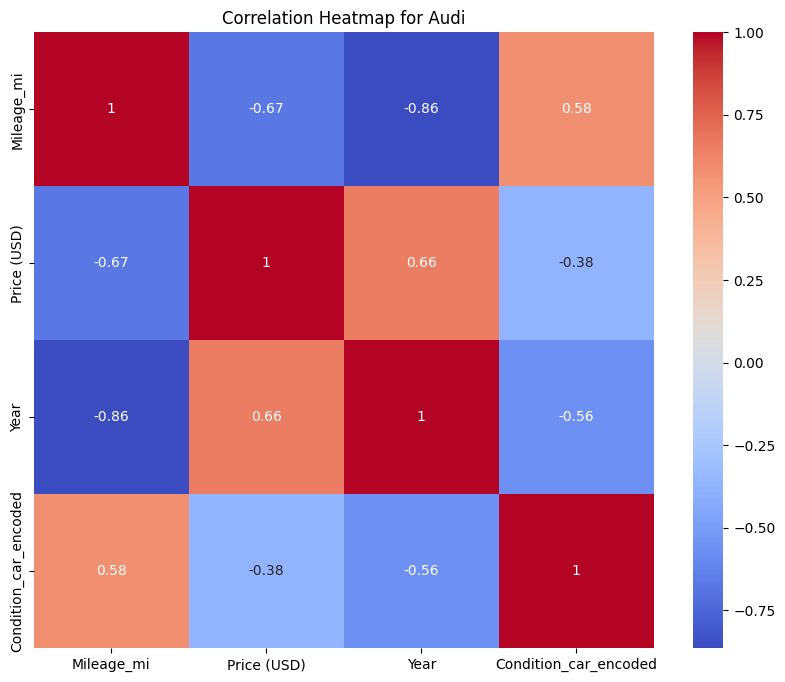

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


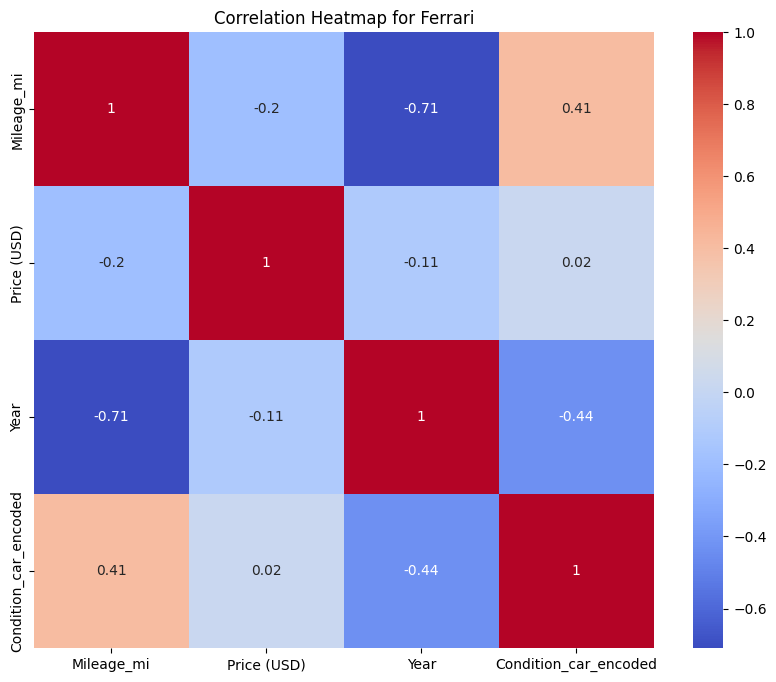

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


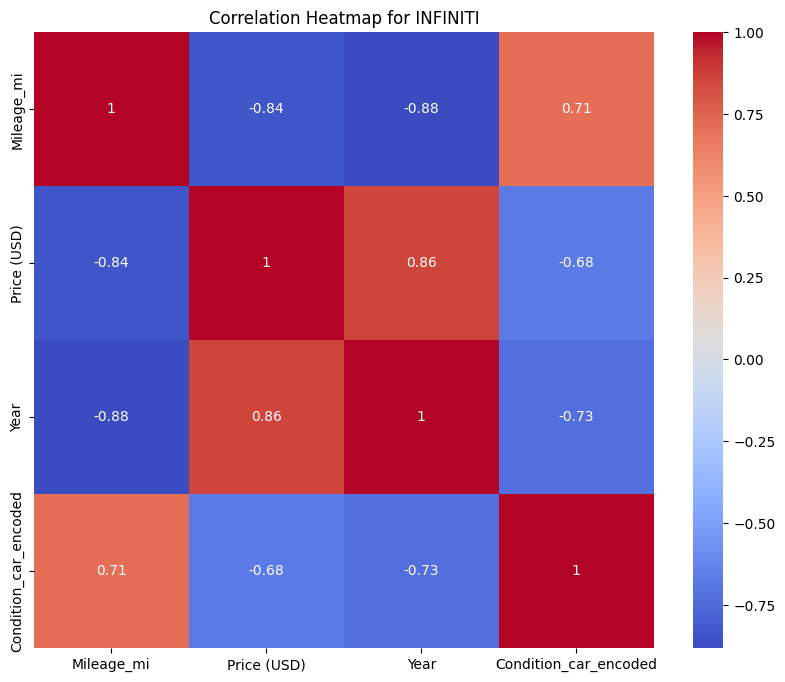

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


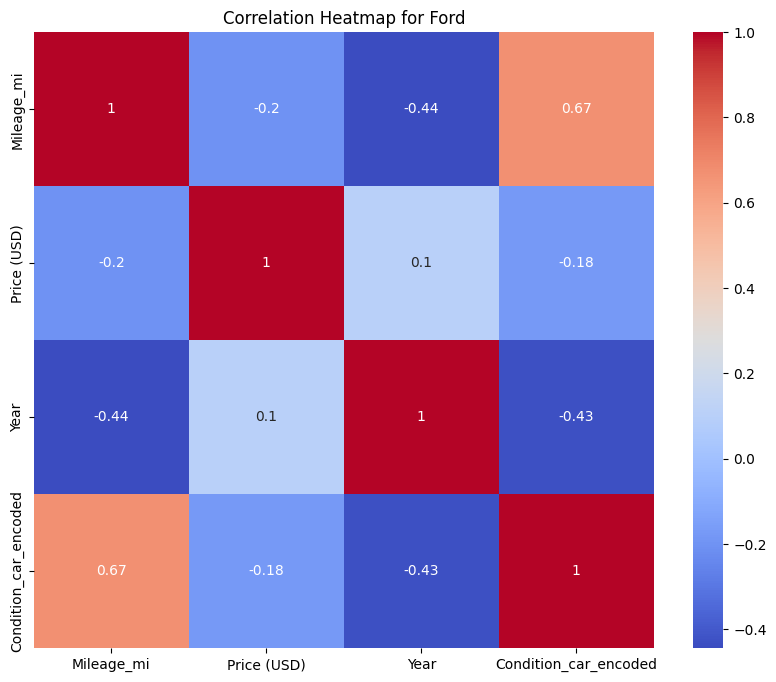

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


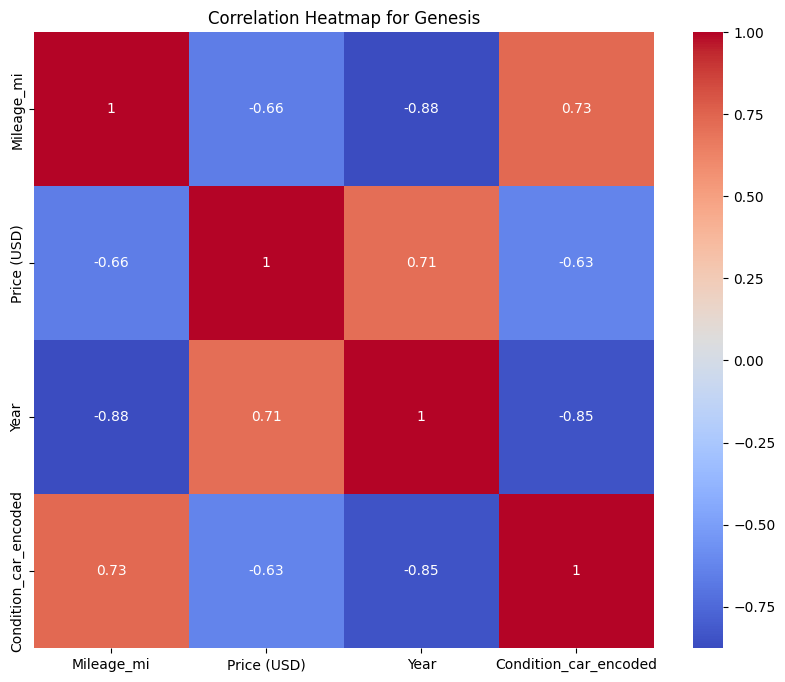

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


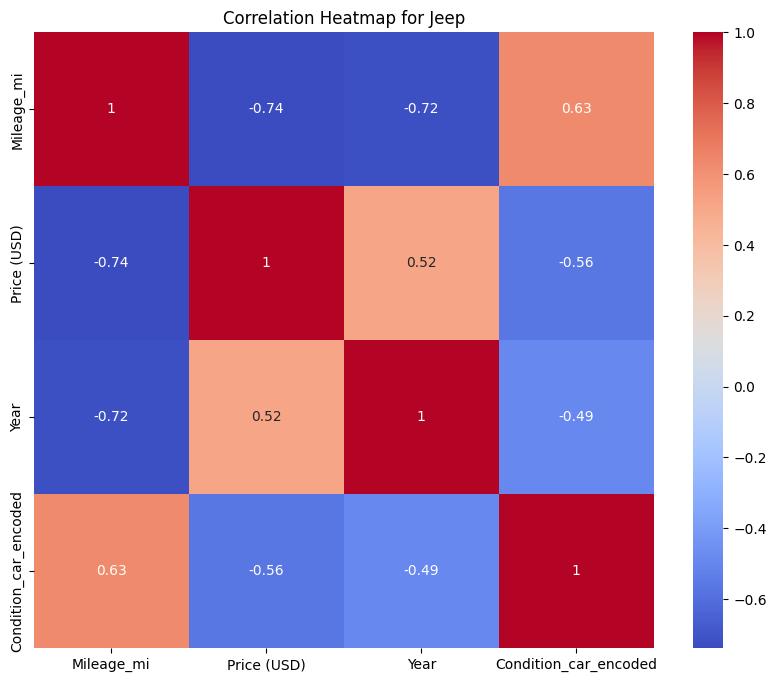

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


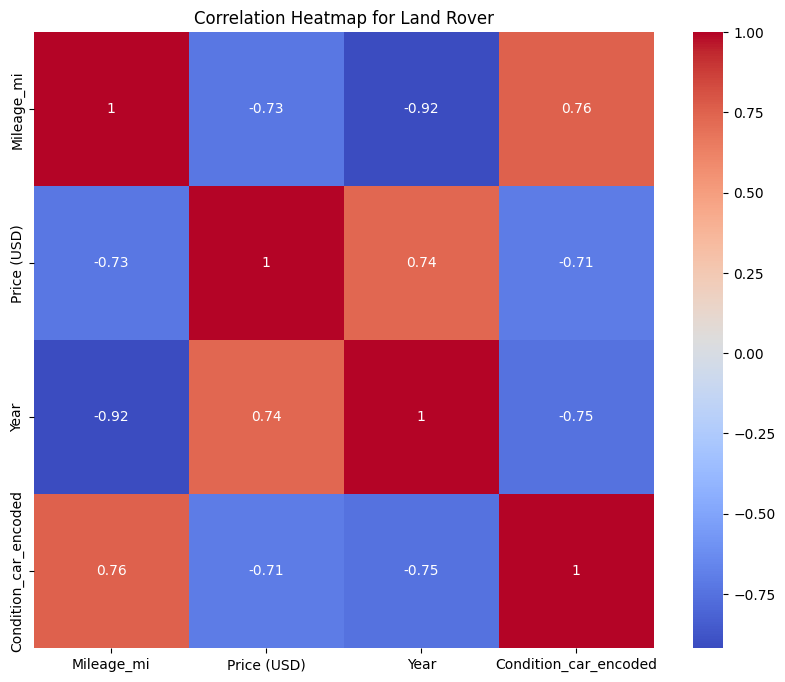

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


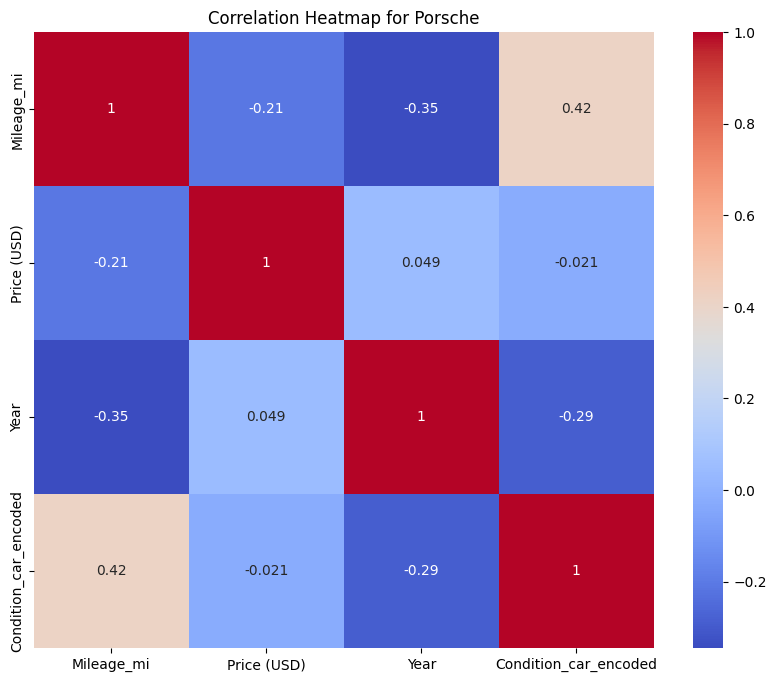

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


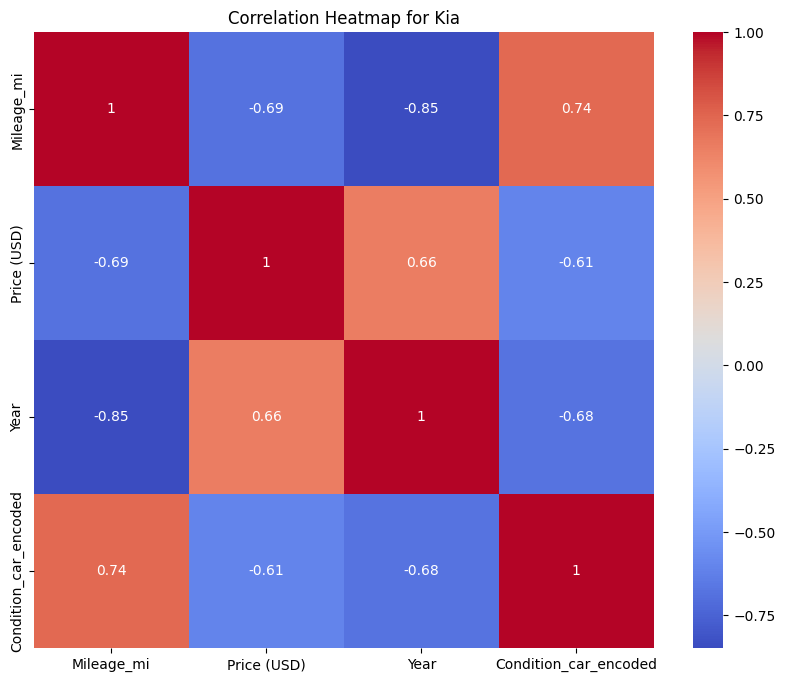

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


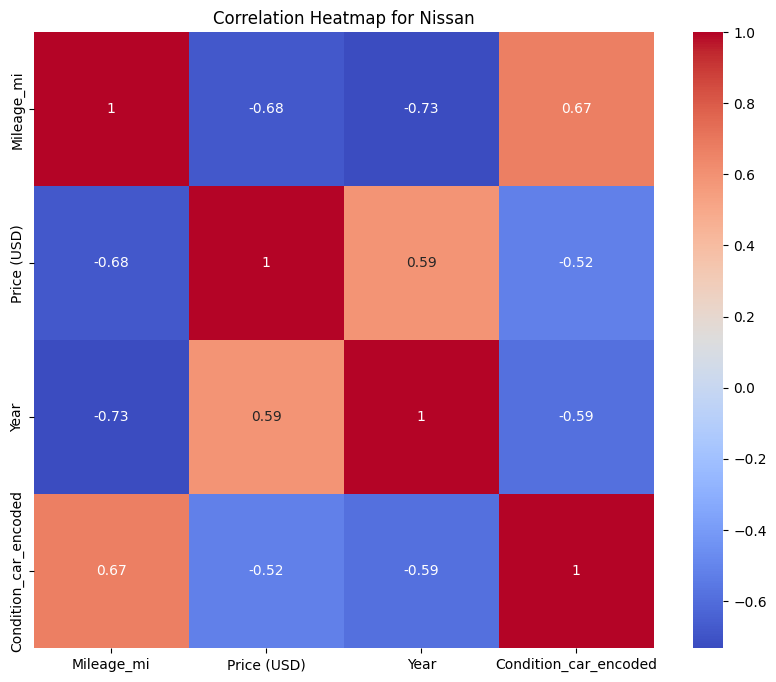

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


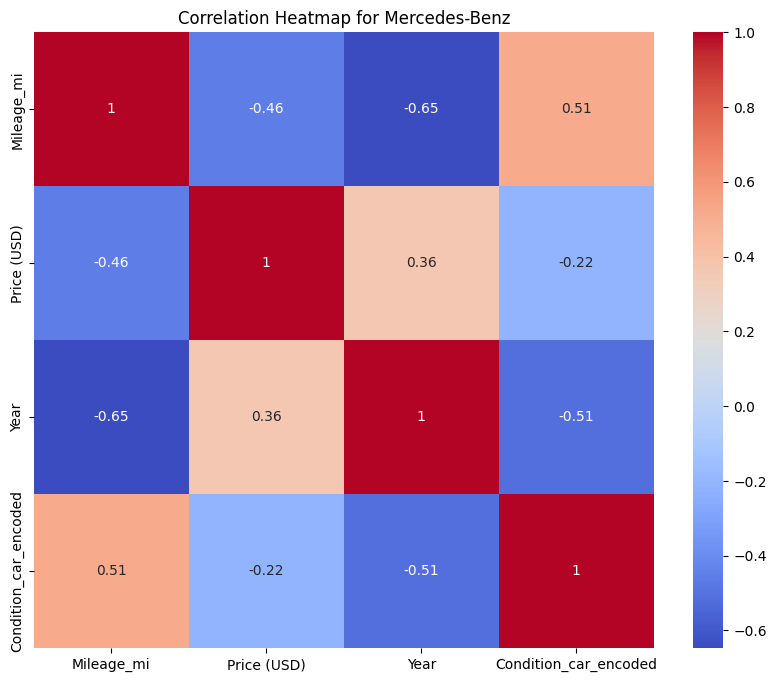

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


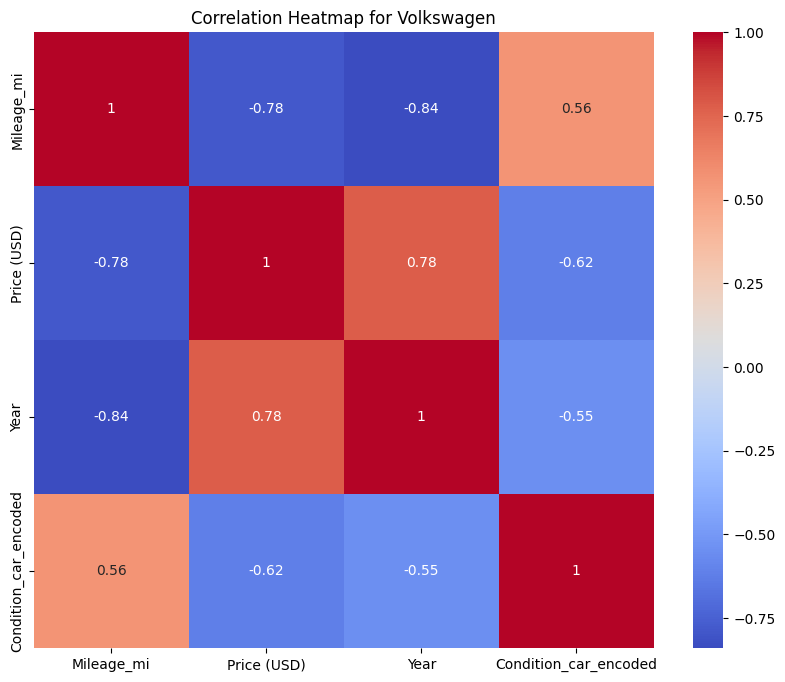

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


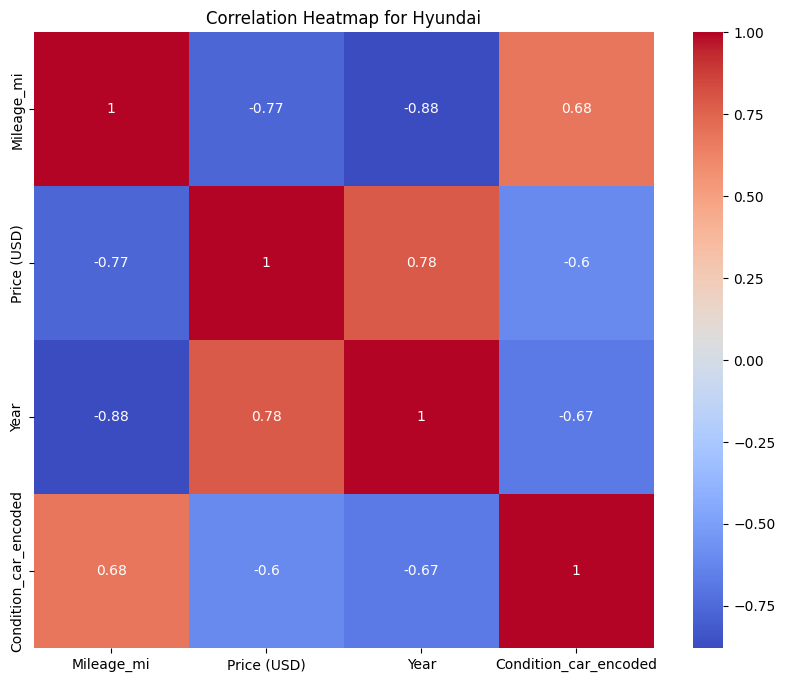

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


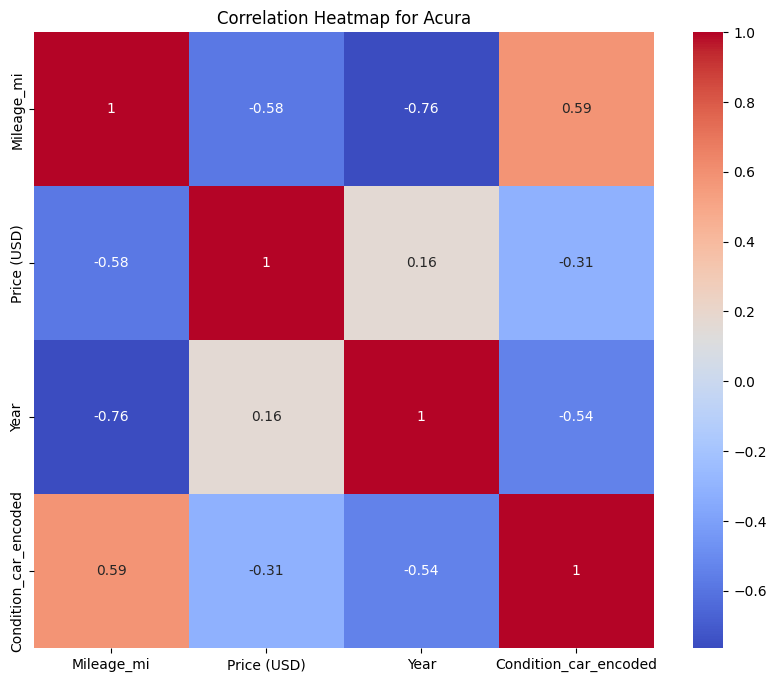

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


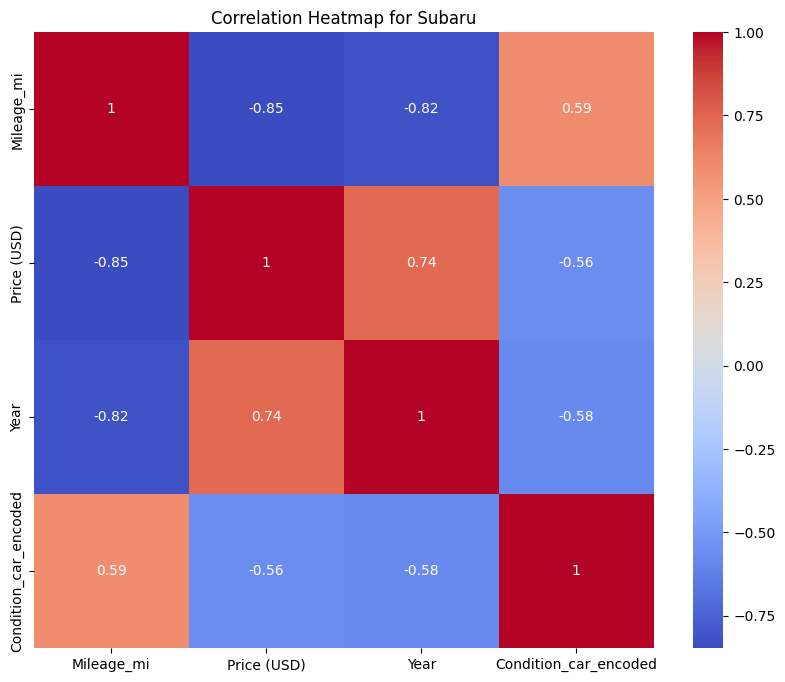

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


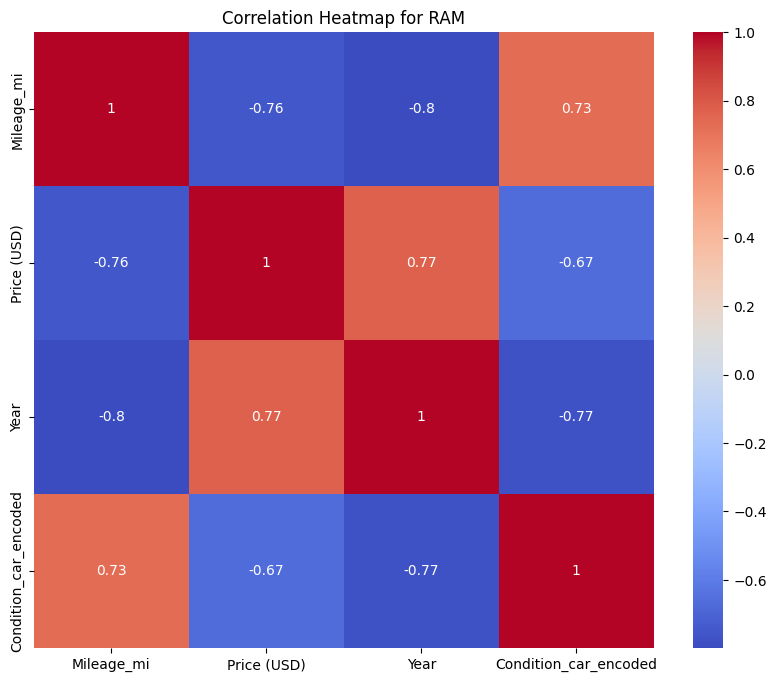

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


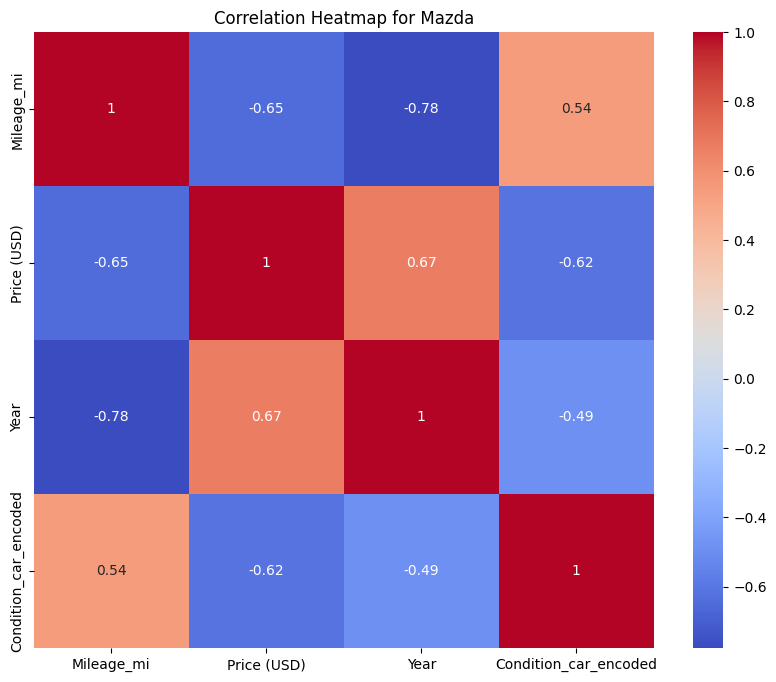

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


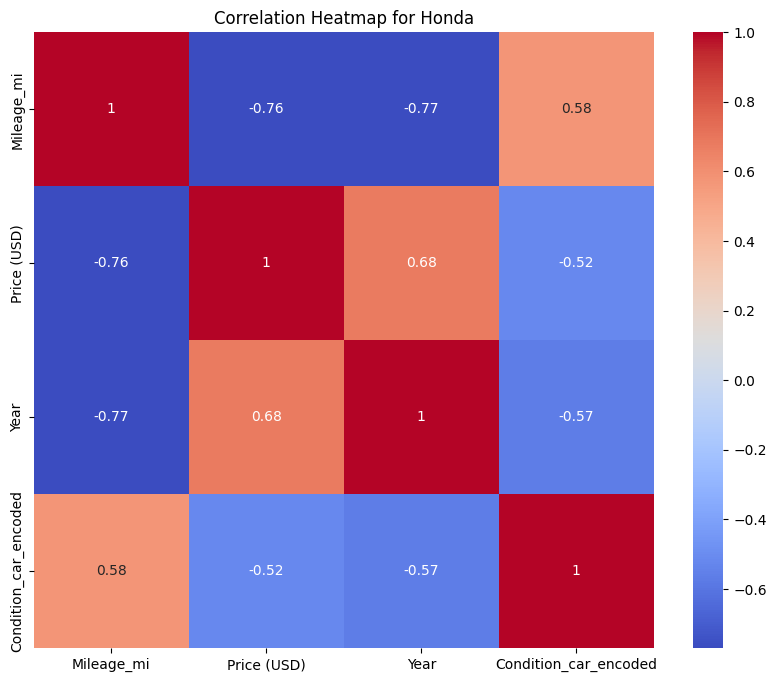

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


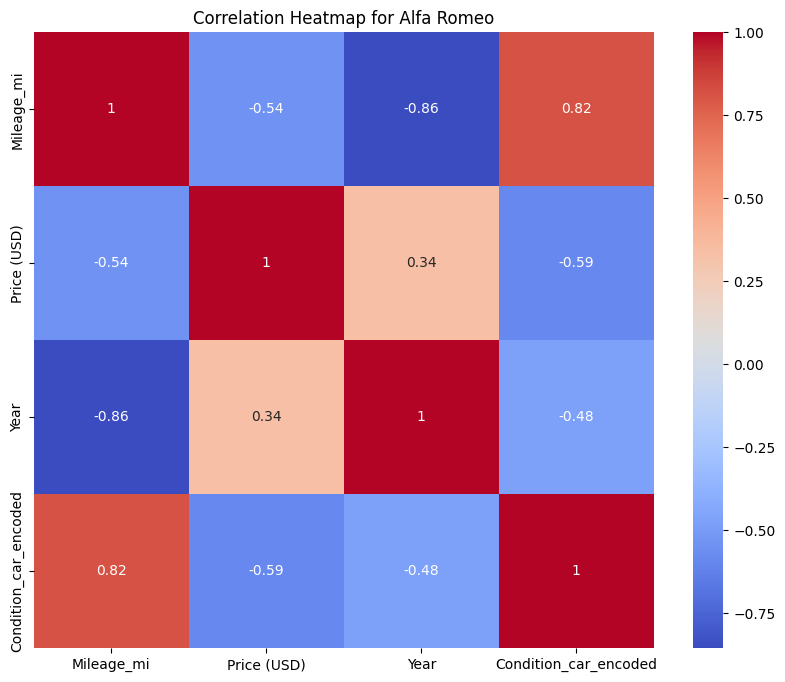

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


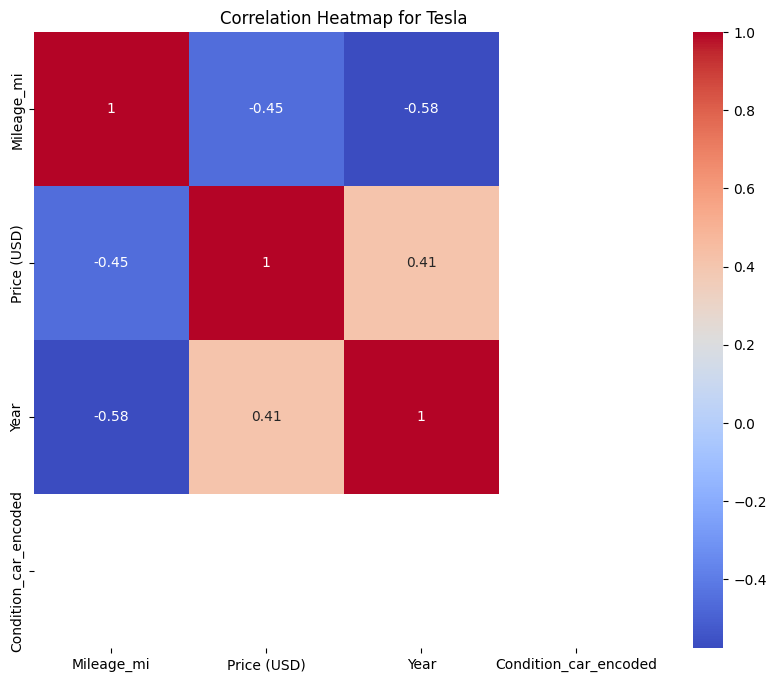

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


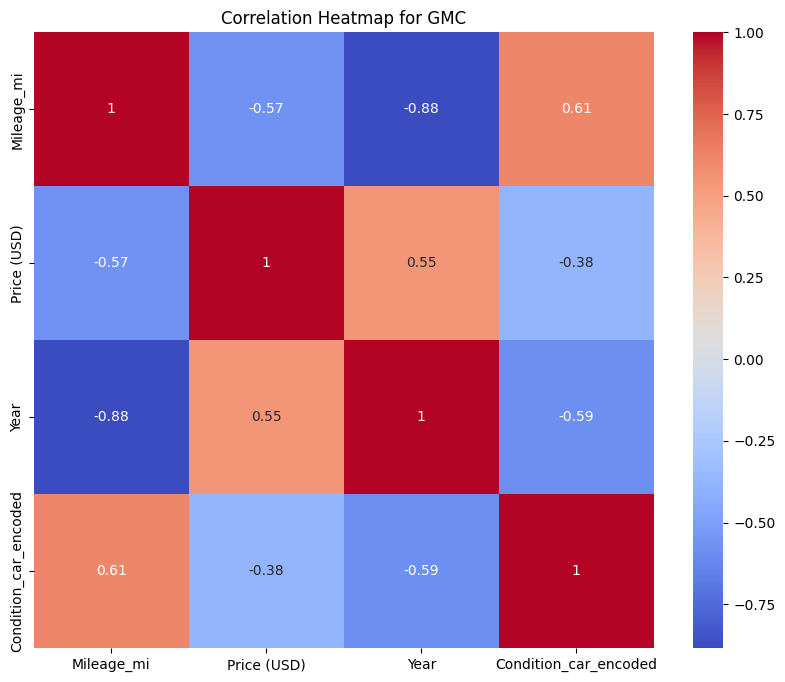

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


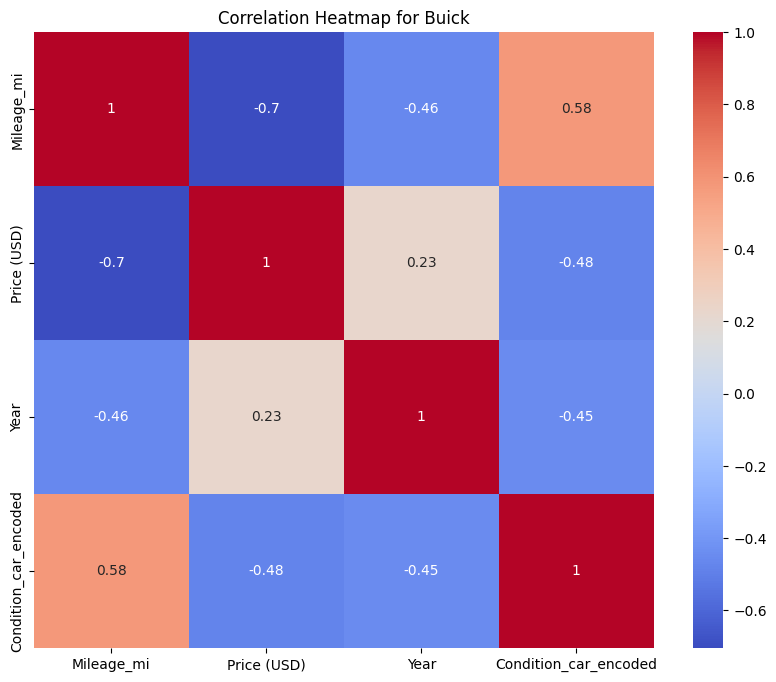

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


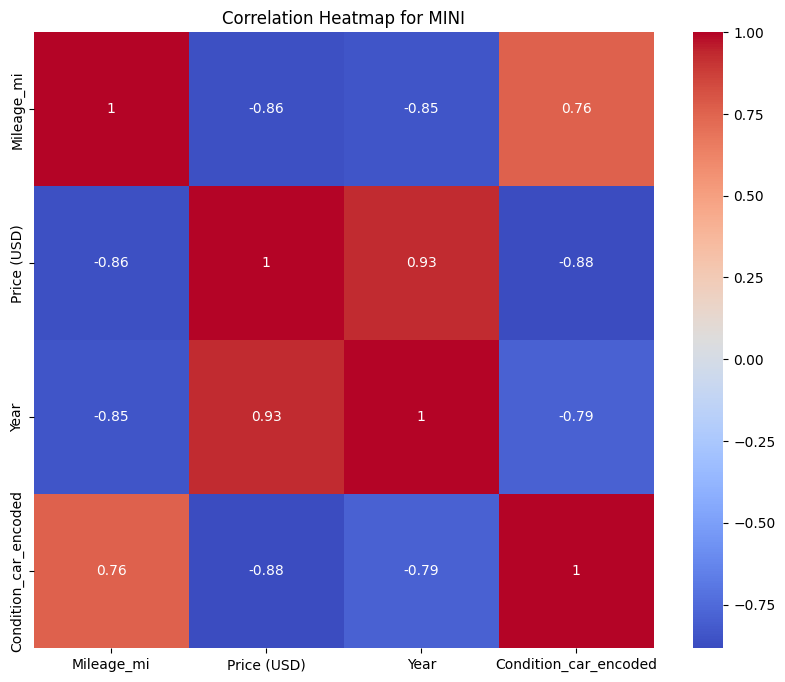

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


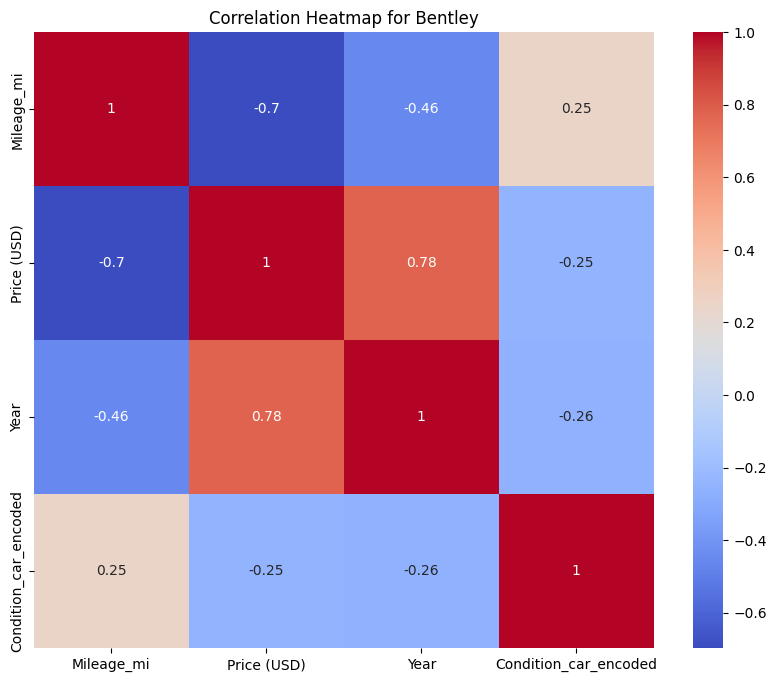

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


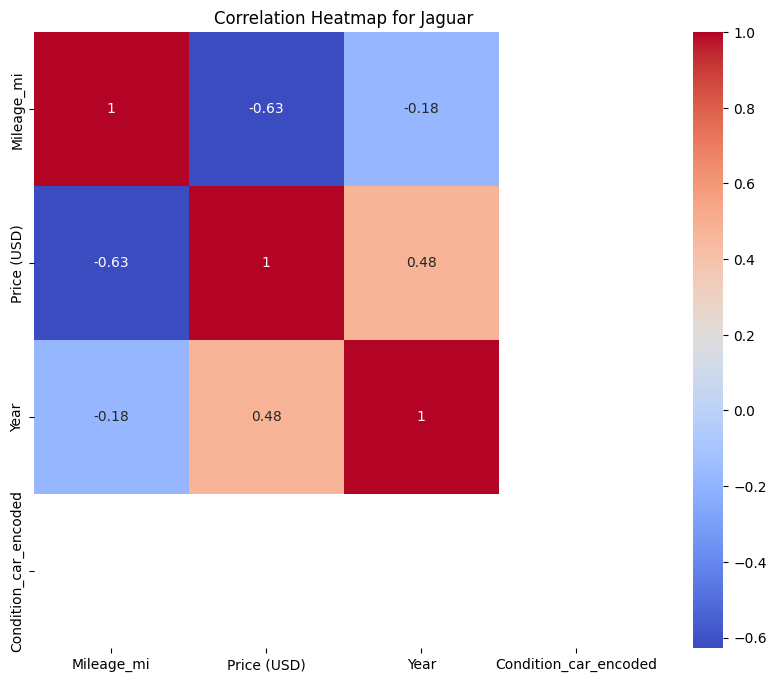

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


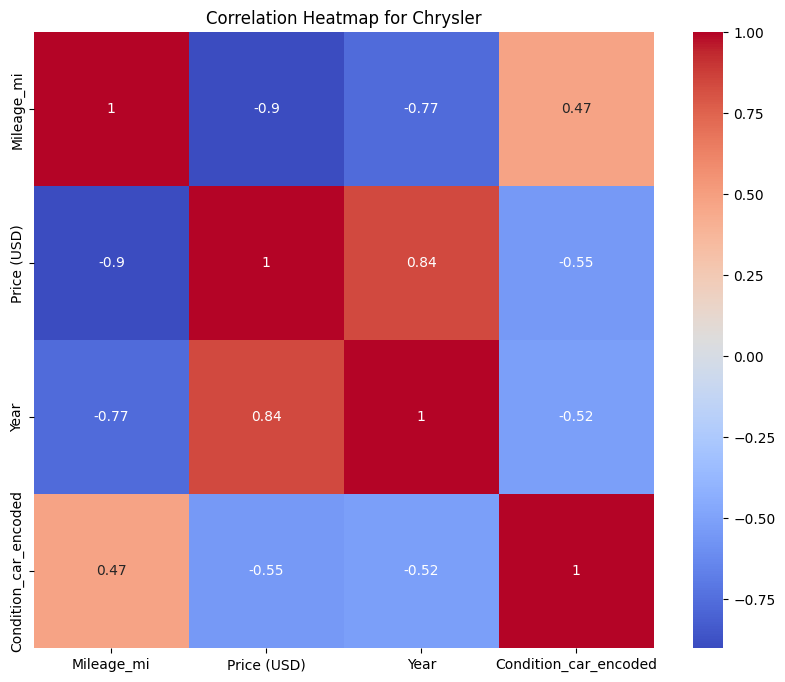

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


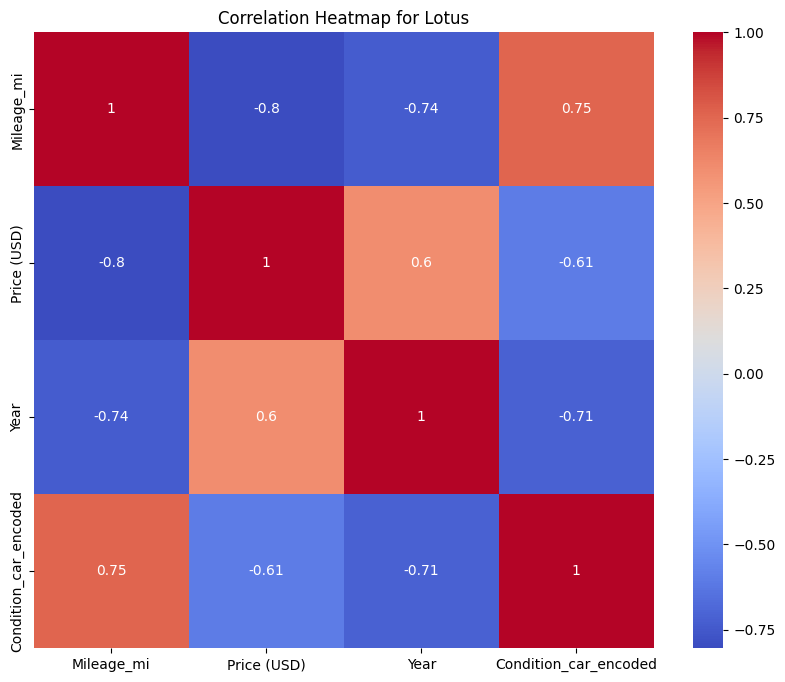

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


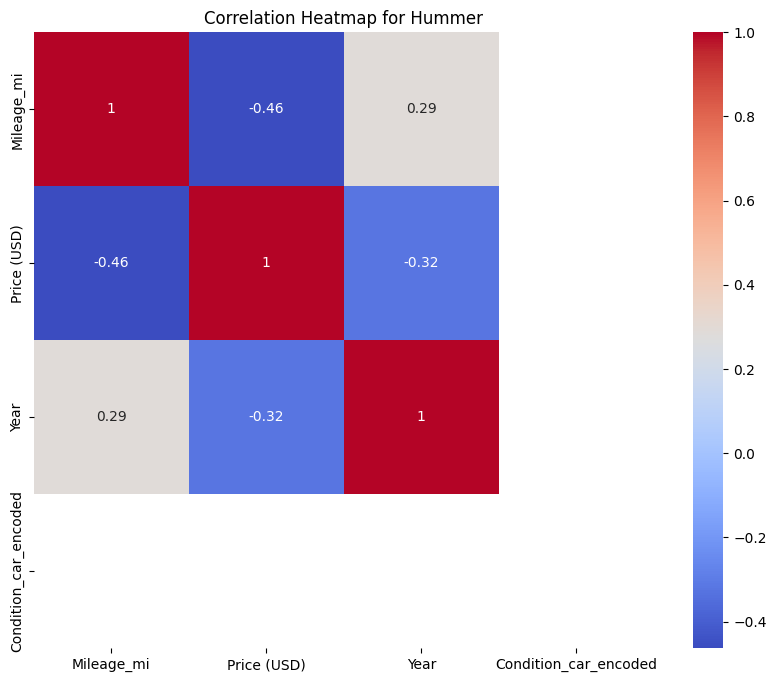

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


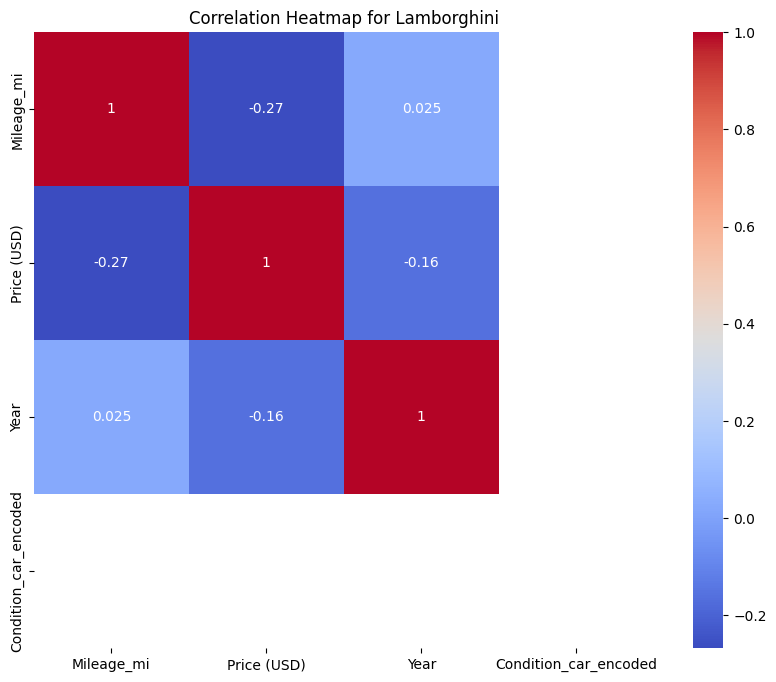

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


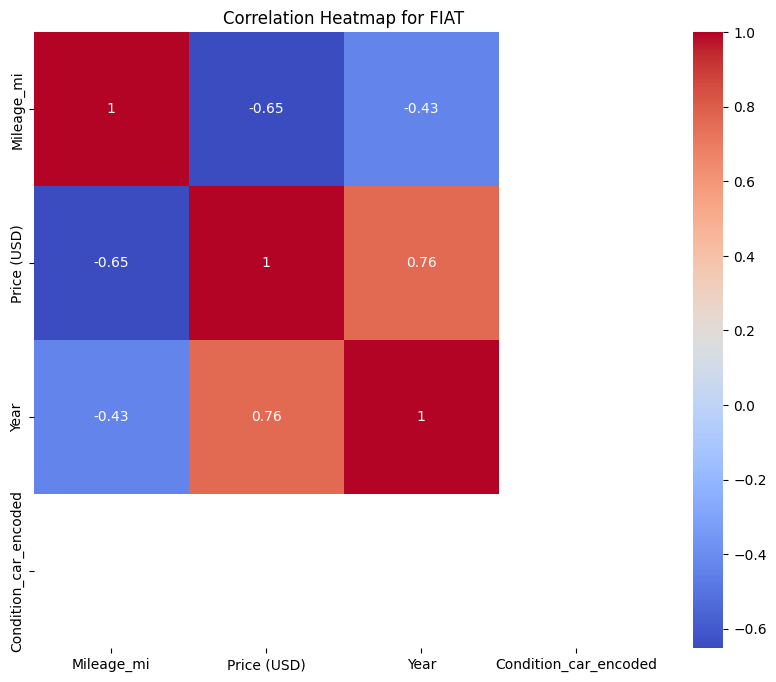

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


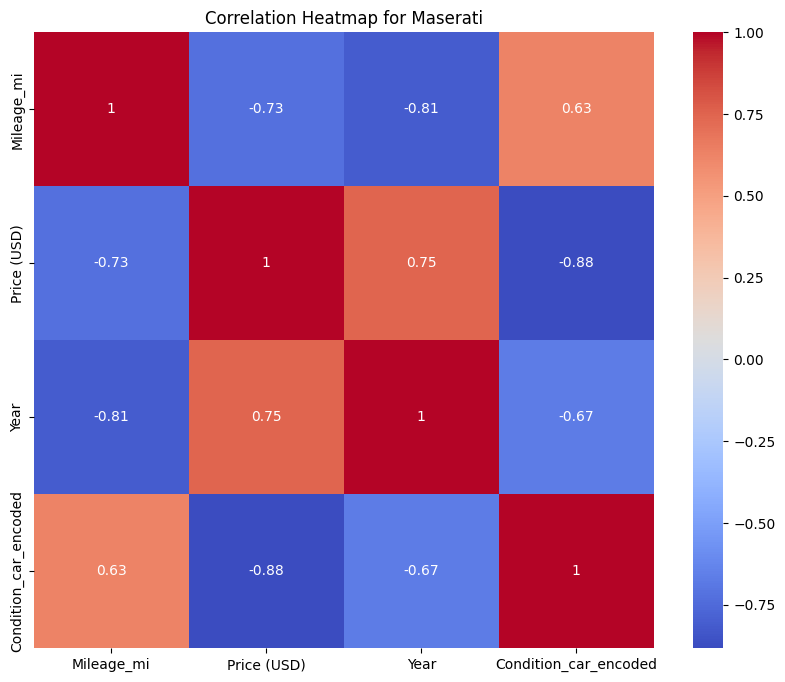

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


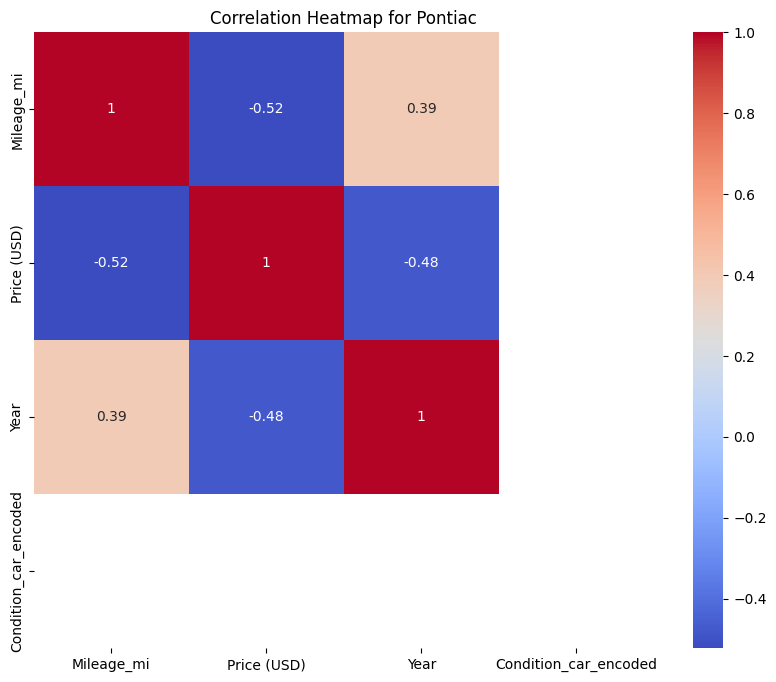

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


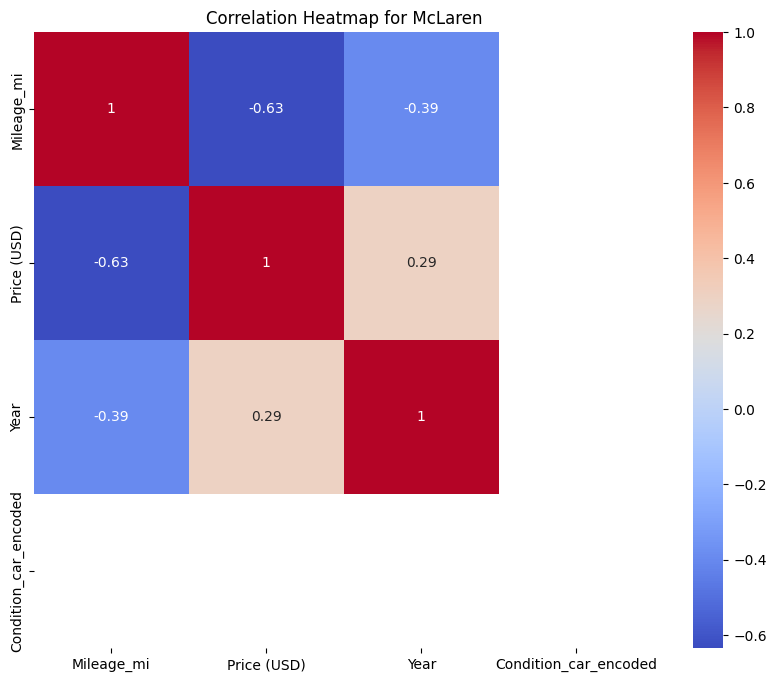

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


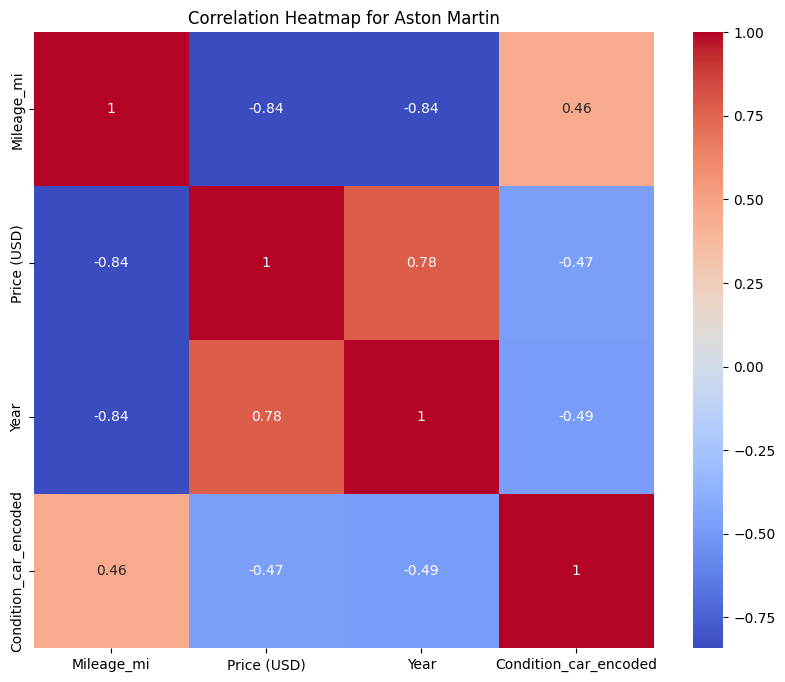

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


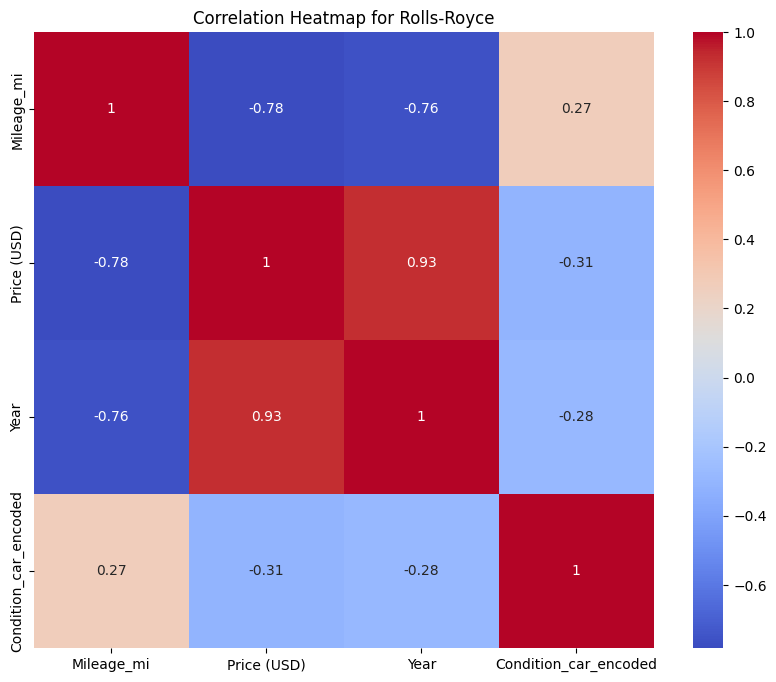

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


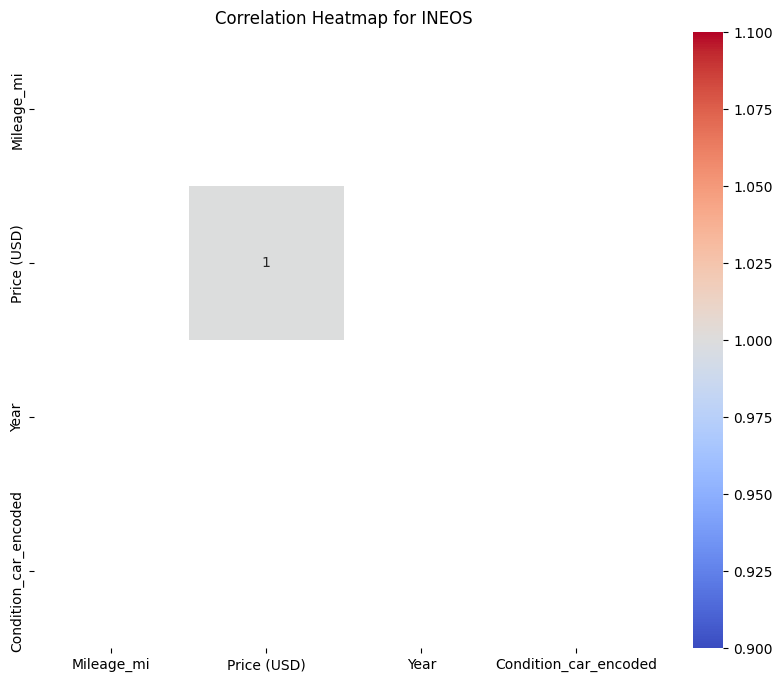

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


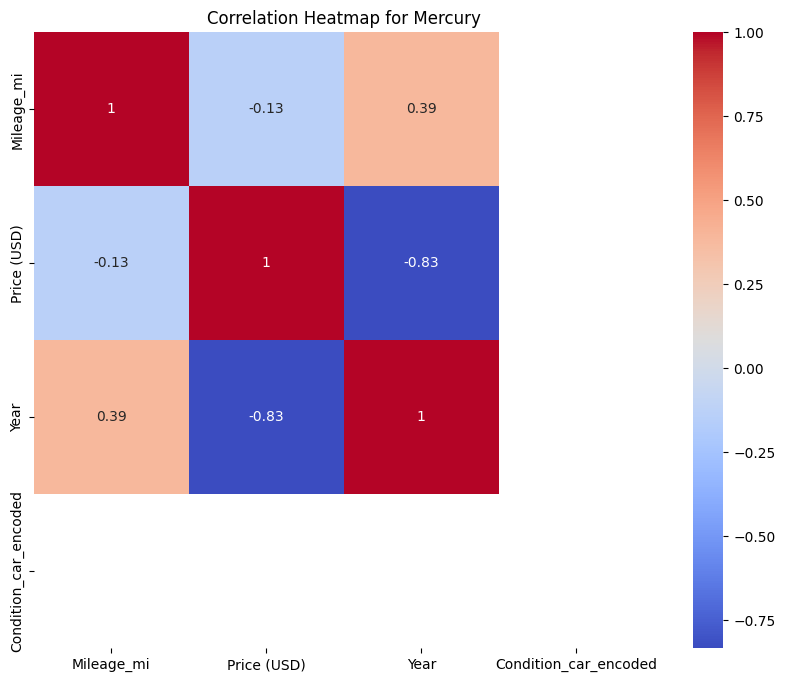

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vm

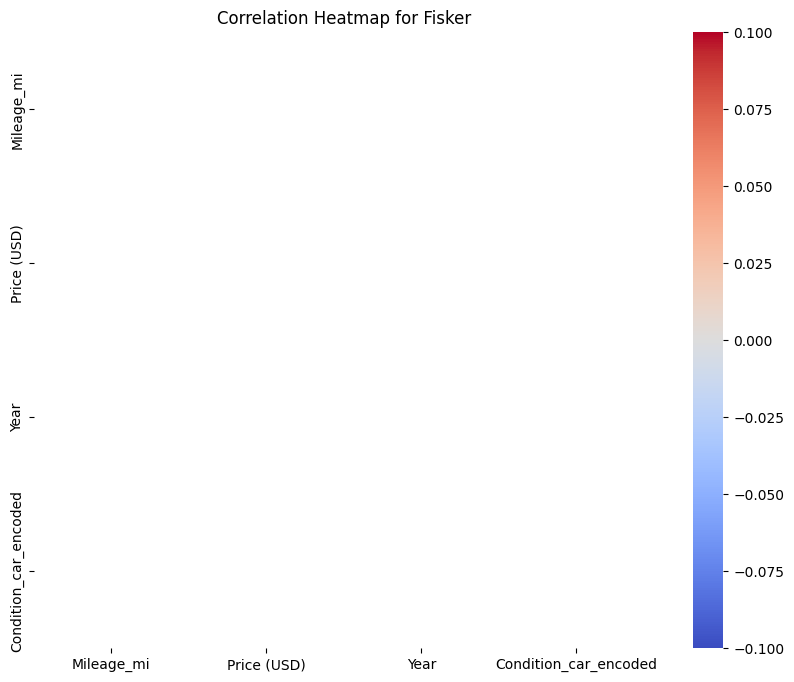

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


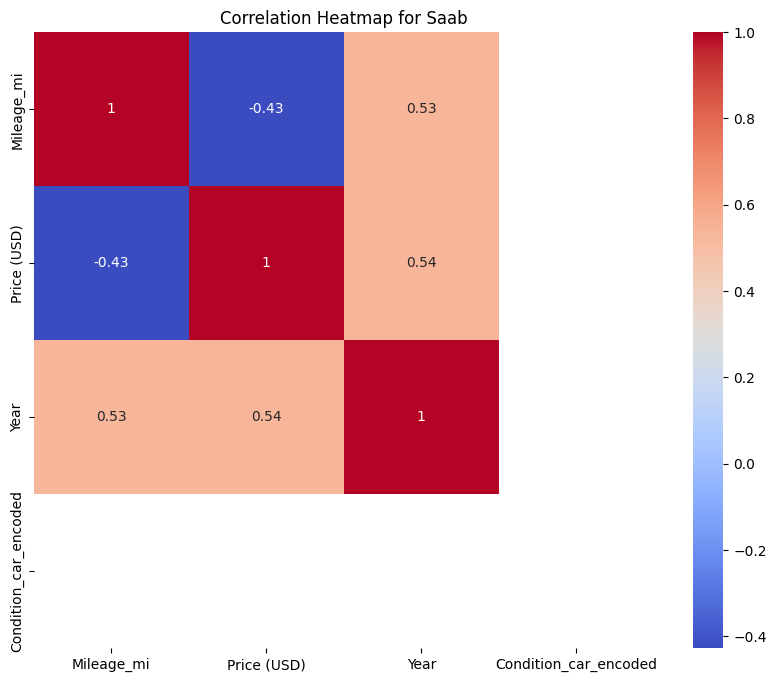

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vm

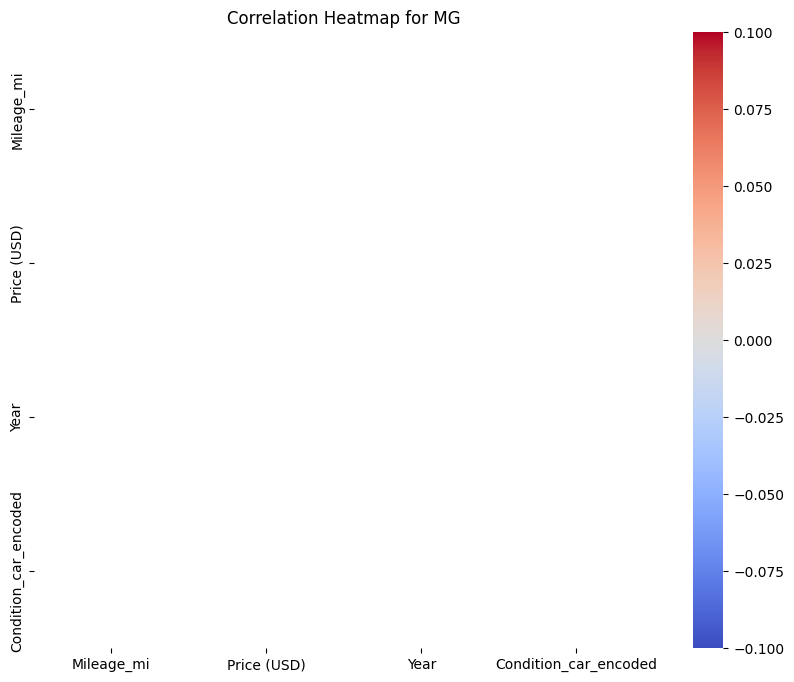

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


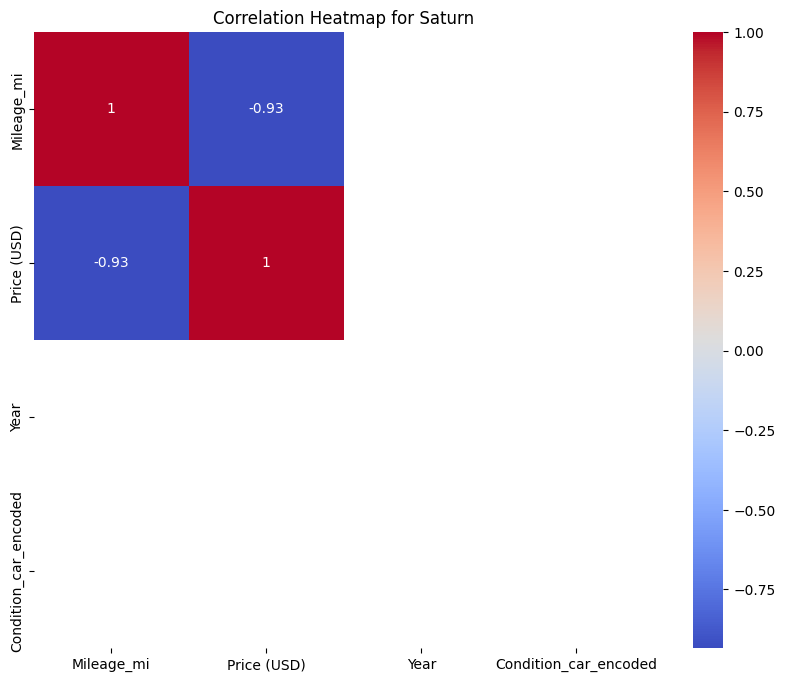

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


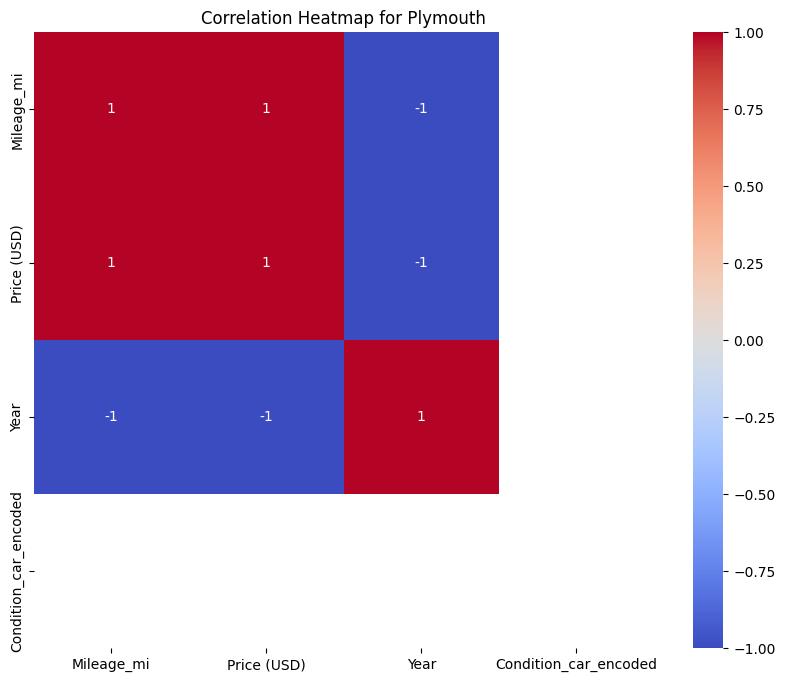

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])


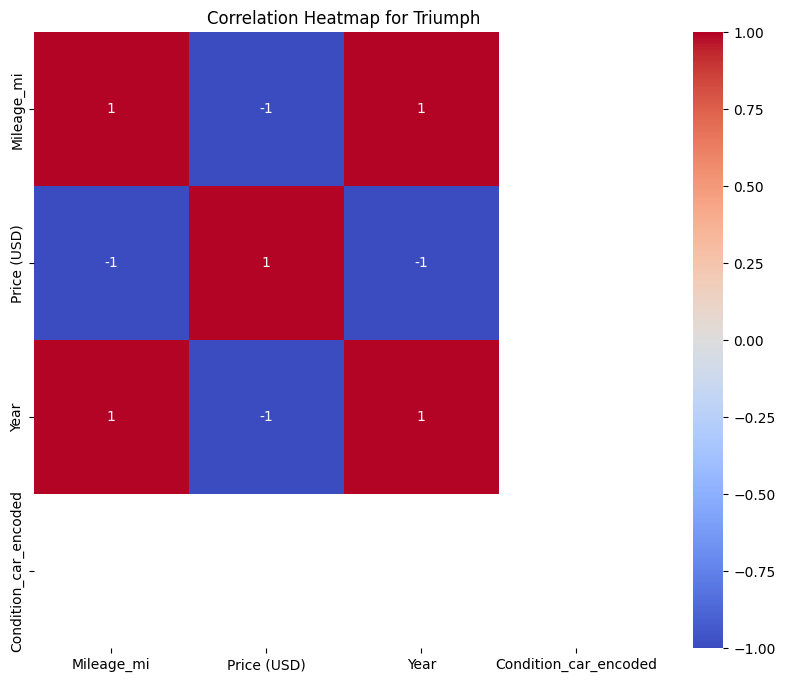

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vm

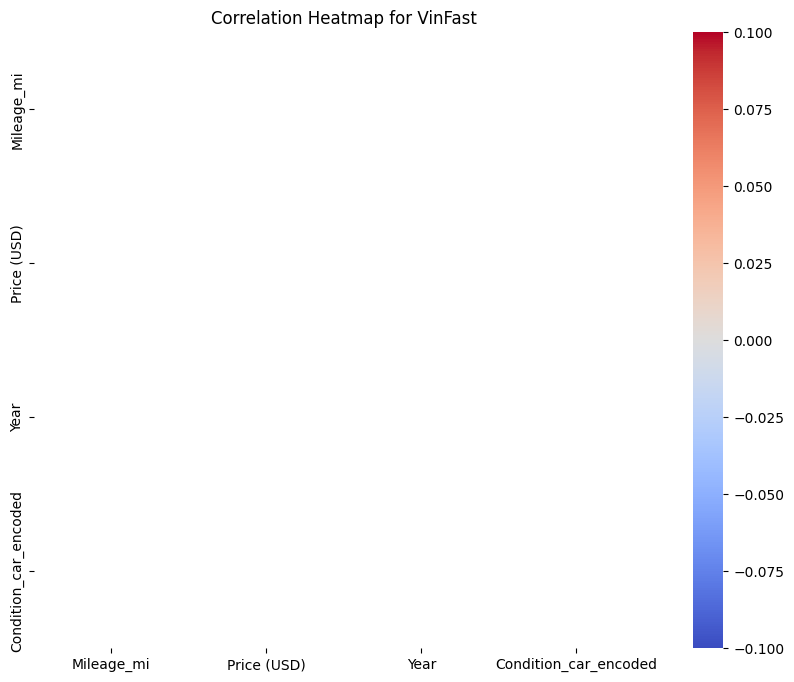

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vm

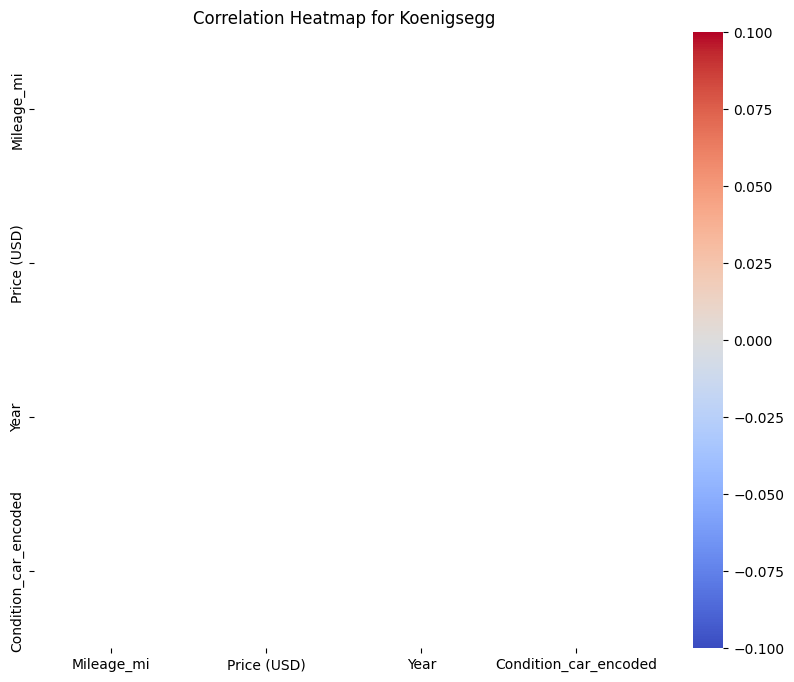

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vm

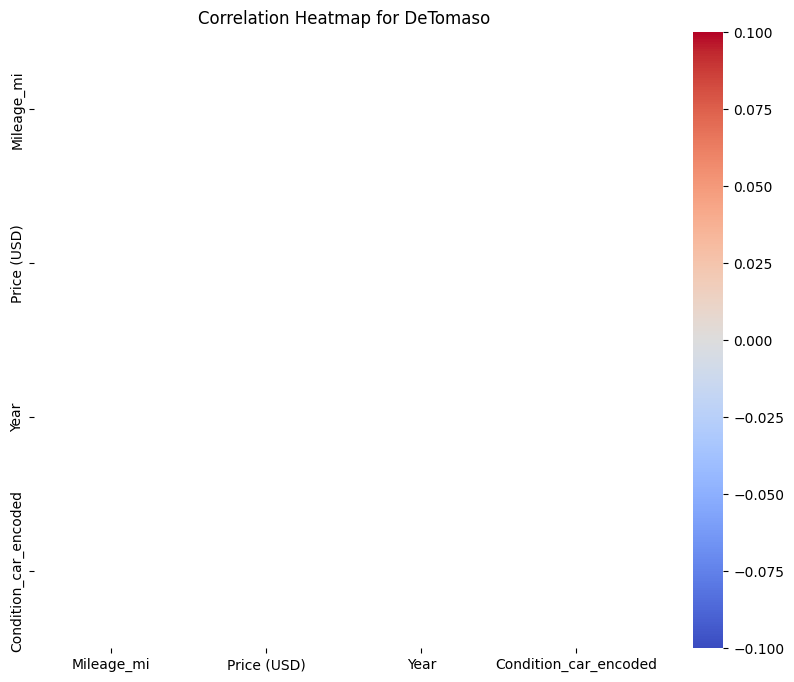

C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
C:\Users\elect\AppData\Local\Temp\ipykernel_27568\4158972578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
c:\Users\elect\Desktop\ds_cars_proj\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vm

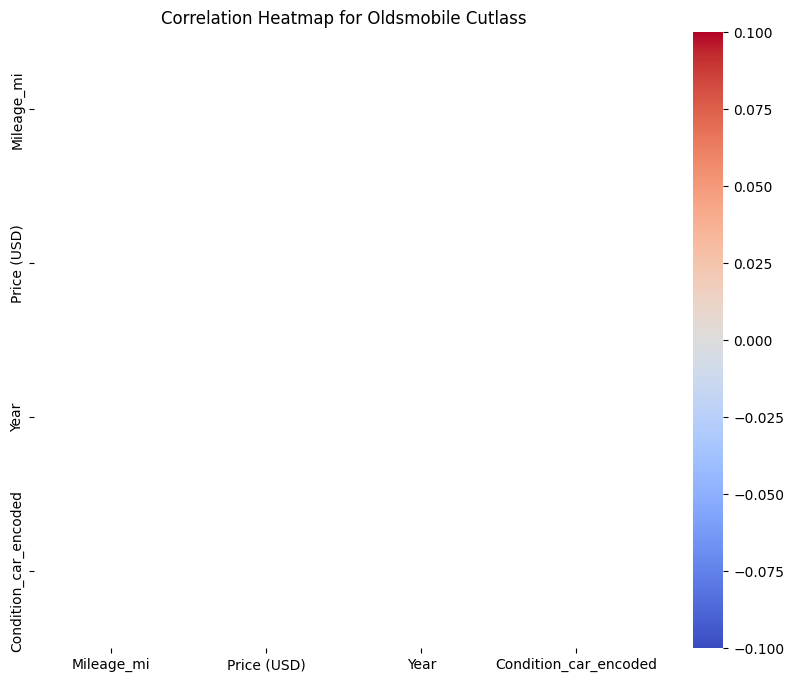

In [462]:
le = LabelEncoder()

for brand, brand_dataframe in brand_dataframes.items():
    brand_dataframe['Year'] = brand_dataframe['Year'].astype(float)
    brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
    numeric_cols = ['Mileage_mi', 'Price (USD)', 'Year', 'Condition_car_encoded']
    plt.figure(figsize=(10, 8))
    sns.heatmap(brand_dataframe[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {brand}')
    plt.show()


## For each section, I noted the corresponding insights.

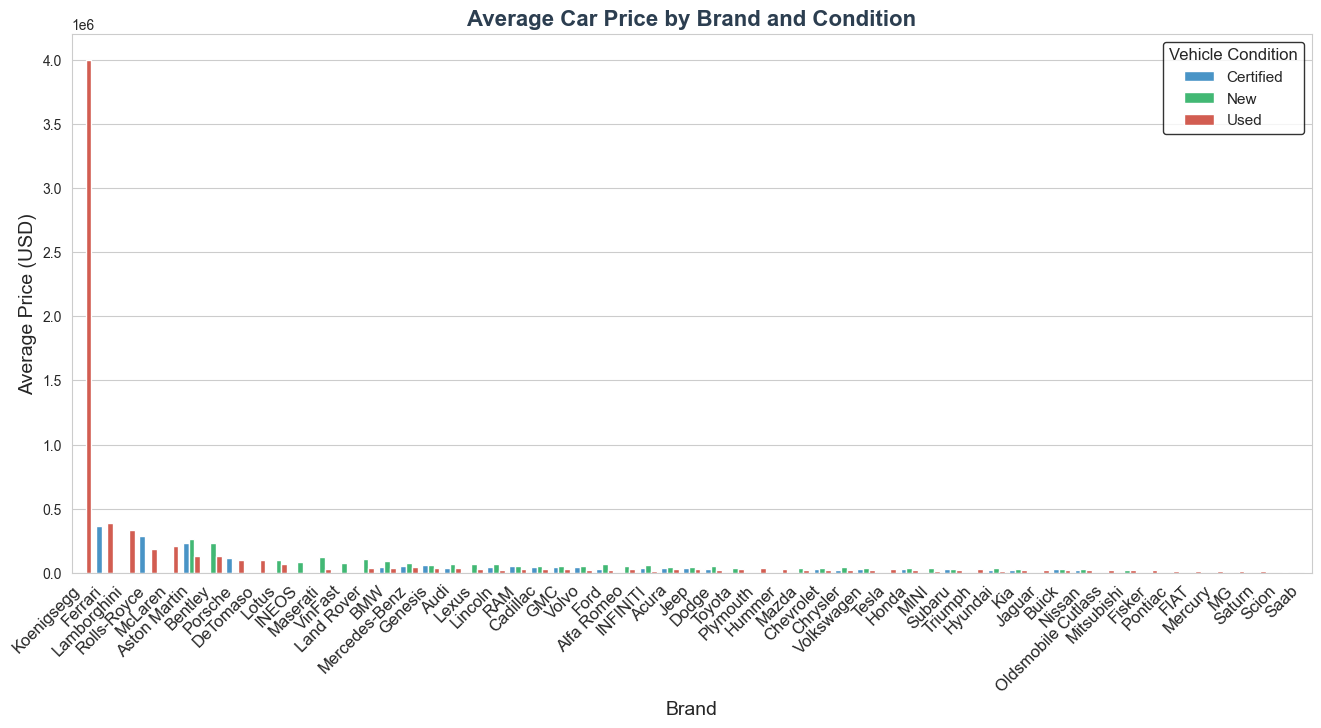

In [12]:
# Calculate the average price by brand and condition
avg_price = df.groupby(['brand', 'Condition_car'])['Price (USD)'].mean().reset_index()

# Sort brands by overall average price (useful for ordered presentation)
brand_order = avg_price.groupby('brand')['Price (USD)'].mean().sort_values(ascending=False).index
avg_price['brand'] = pd.Categorical(avg_price['brand'], categories=brand_order, ordered=True)

# Define the style and colors for a polished presentation
sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
palette = {"New": "#2ecc71", "Used": "#e74c3c", "Certified": "#3498db"}

# Create the bar plot with a colorful palette
sns.barplot(data=avg_price, x='brand', y='Price (USD)', hue='Condition_car', palette=palette)

# Customize labels and title
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Brand", fontsize=14)
plt.ylabel("Average Price (USD)", fontsize=14)
plt.title("Average Car Price by Brand and Condition", fontsize=16, fontweight='bold', color='#2c3e50')

# Add a more readable legend
plt.legend(title="Vehicle Condition", title_fontsize=12, fontsize=11, loc="upper right", frameon=True, edgecolor="black")

# Display the plot
plt.show()


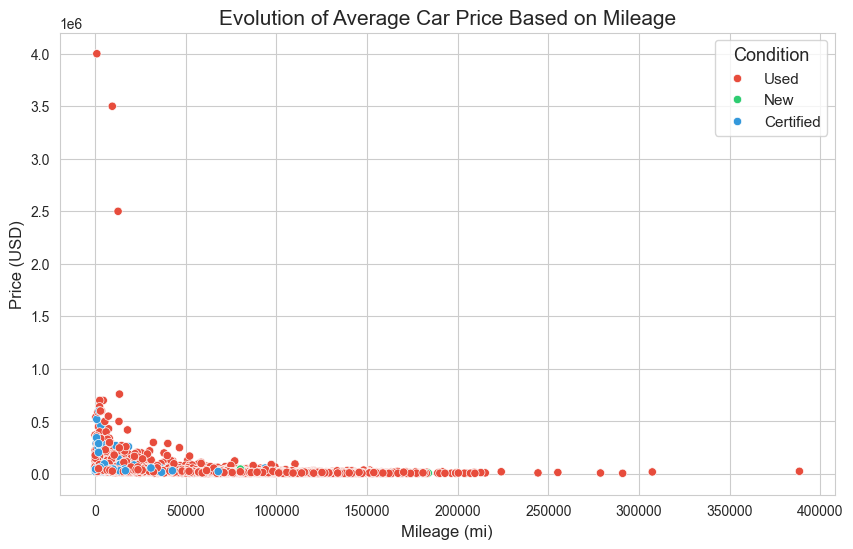

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage_mi', y='Price (USD)', hue='Condition_car', palette=palette)
plt.title('Evolution of Average Car Price Based on Mileage', fontsize=15)
plt.xlabel('Mileage (mi)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Condition', title_fontsize='13', fontsize='11')
plt.show()


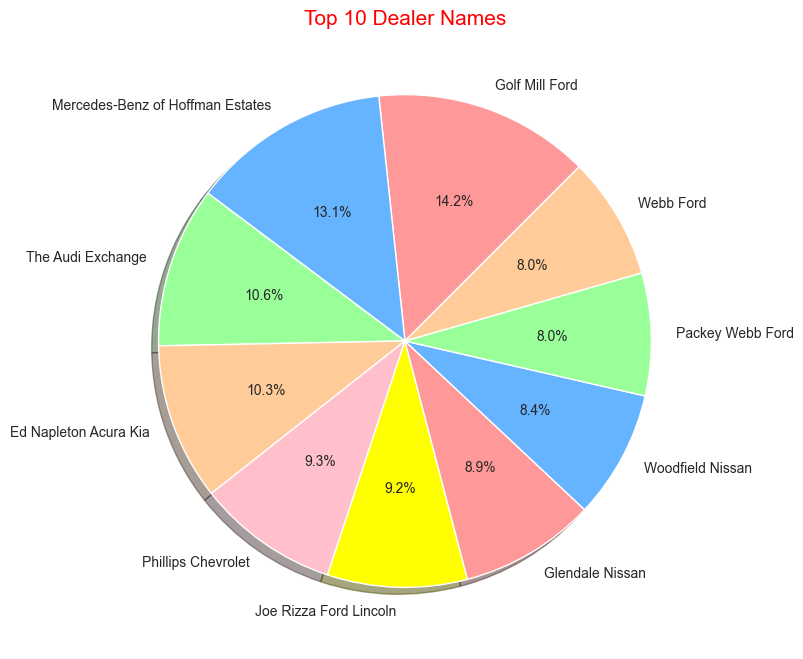

In [17]:
labels = df["Dealer Name"].value_counts().head(10).index
sizes = df["Dealer Name"].value_counts().head(10)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Top 10 Dealer Names',color = 'red',fontsize = 15)
plt.show()

In [24]:
df['Dealer Name'].value_counts().sort_values(ascending=False).head(10)

Dealer Name
Golf Mill Ford                      113
Mercedes-Benz of Hoffman Estates    104
The Audi Exchange                    84
Ed Napleton Acura Kia                82
Phillips Chevrolet                   74
Joe Rizza Ford Lincoln               73
Glendale Nissan                      71
Woodfield Nissan                     67
Webb Ford                            64
Packey Webb Ford                     64
Name: count, dtype: int64

In [ ]:
import folium

# List of dealer names and their precise coordinates
dealers = [
    ("Golf Mill Ford", 42.051183300000005, -87.83387903096333),
    ("Mercedes-Benz of Hoffman Estates", 42.048919049999995, -88.1049154048065),
    ("The Audi Exchange", 42.139192, -87.822823),
    ("Ed Napleton Acura Kia", 41.801193, -87.877048),
    ("Phillips Chevrolet", 41.5729774, -87.55983614182739),
    ("Joe Rizza Ford Lincoln", 41.558153, -87.800293),
    ("Glendale Nissan", 34.13706500000001, -118.25537322456444),
    ("Woodfield Nissan", 42.0503035, -88.09784249305503),
    ("Webb Ford", 37.36776860997453, -86.07402365718755),
    ("Packey Webb Ford", 41.8498, -88.0888)
]

# Create a map centered on the USA
m = folium.Map(location=[41.85, -87.65], zoom_start=8)

# Add markers to the map
for dealer, lat, lon in dealers:
    folium.Marker(
        location=[lat, lon],
        popup=f"<b>{dealer}</b>",
        tooltip=dealer,
        icon=folium.Icon(color="blue", icon="car", prefix="fa")  # Car icon
    ).add_to(m)

# Save as an interactive HTML file
m.save("dealers_map.html")

# Display in the Jupyter notebook 
m


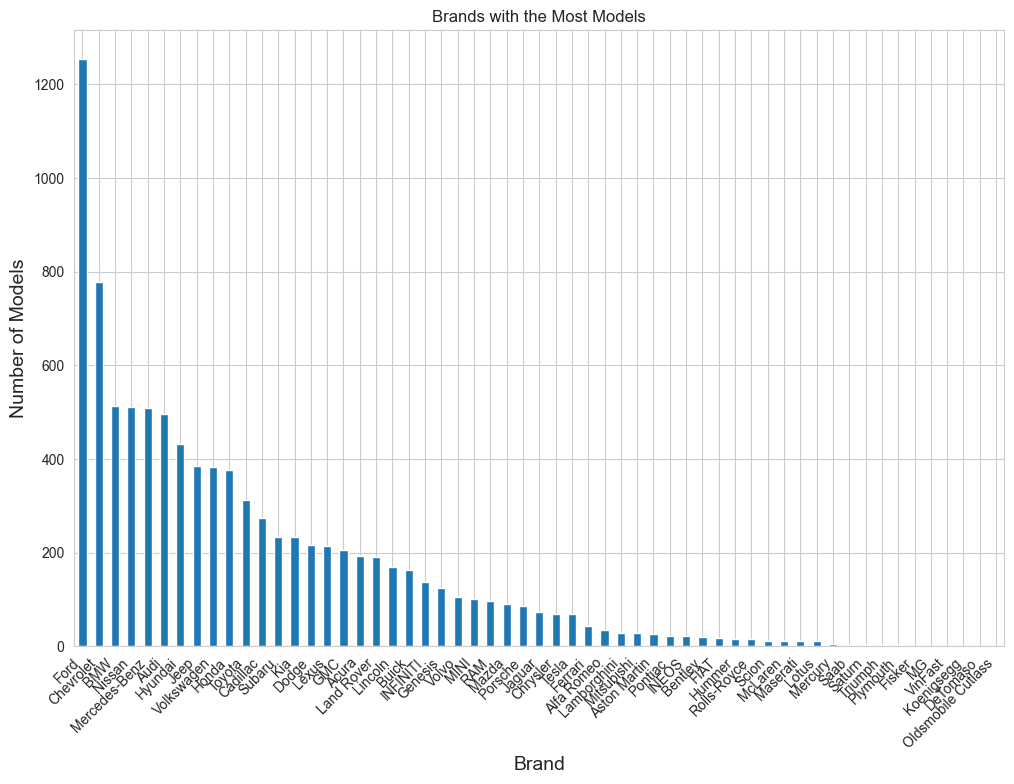

In [28]:
# Group by brand and count the number of models for each brand
brand_model_counts = df['brand'].value_counts()

# Plot the brands with the most models
plt.figure(figsize=(12, 8))
brand_model_counts.plot(kind='bar', title='Brands with the Most Models')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Models', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\elect\AppData\Local\Temp\ipykernel_1576\3062313168.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




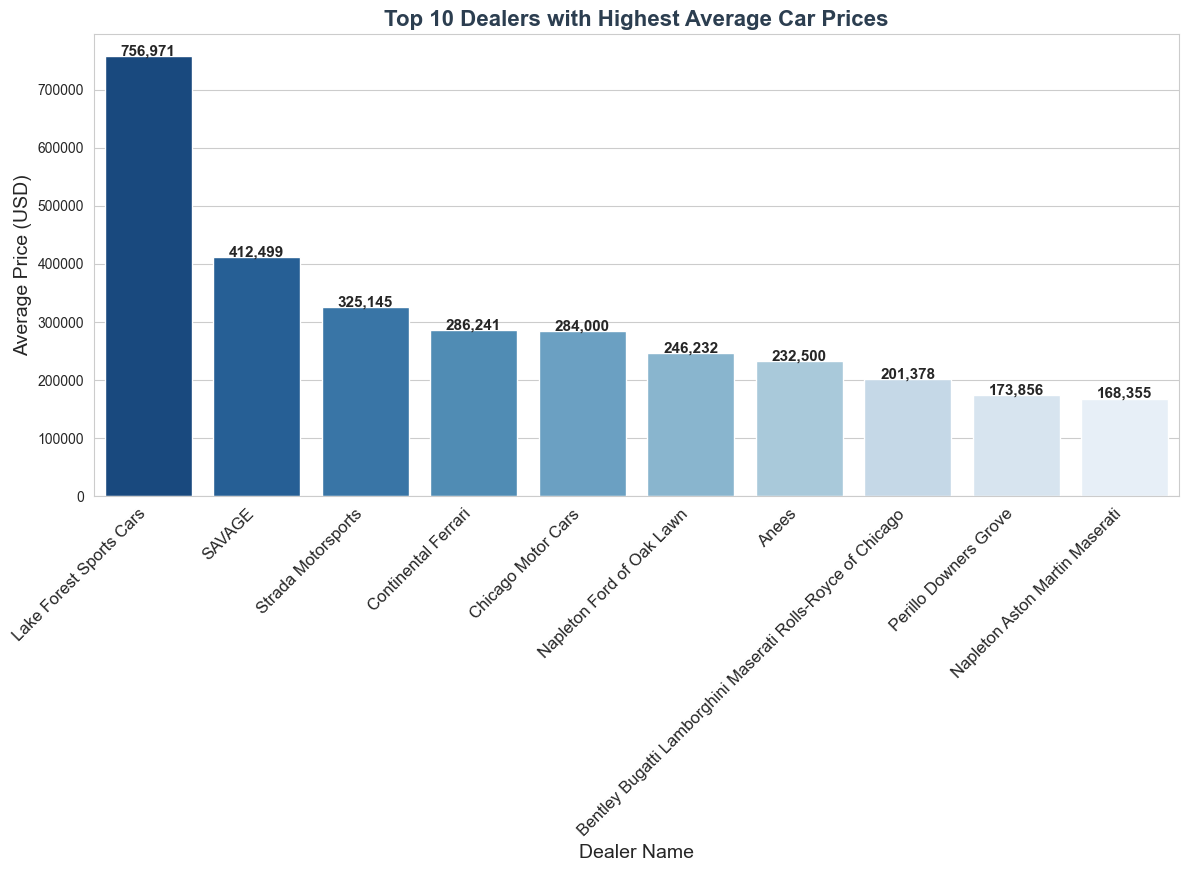

In [41]:
# Calculate the average price per dealer
avg_price = df.groupby('Dealer Name')['Price (USD)'].mean().reset_index()

# Sort and select the top 10
top_10_dealers = avg_price.sort_values(by='Price (USD)', ascending=False).head(10)

# Define the style and colors for a polished presentation
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Create the bar plot
sns.barplot(data=top_10_dealers, x='Dealer Name', y='Price (USD)', palette="Blues_r")

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Customize titles and axes
plt.xlabel("Dealer Name", fontsize=14)
plt.ylabel("Average Price (USD)", fontsize=14)
plt.title("Top 10 Dealers with Highest Average Car Prices", fontsize=16, fontweight='bold', color='#2c3e50')

# Add annotations on the bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, 
                   p.get_height() + 1000,  # Adjusted position
                   f'{int(p.get_height()):,}', 
                   ha="center", fontsize=11, fontweight="bold")

# Display the plot
plt.show()


C:\Users\elect\AppData\Local\Temp\ipykernel_1576\1252765115.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




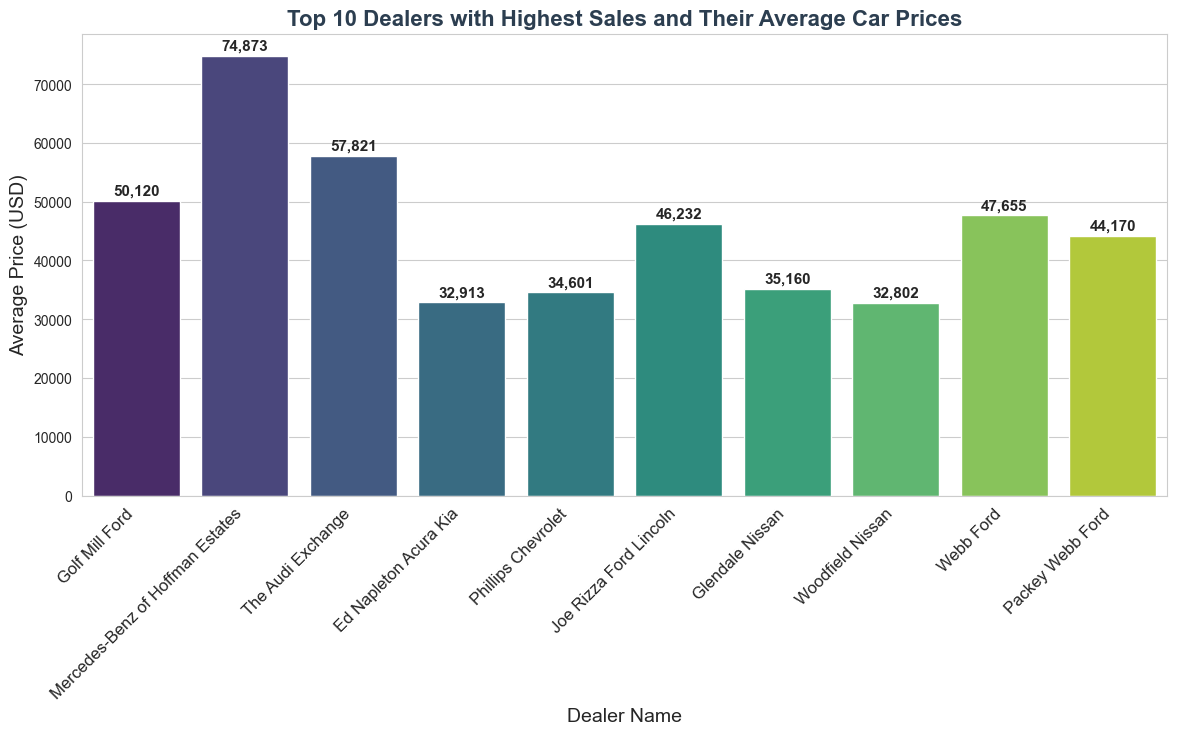

In [40]:
# Calculate the number of sales per dealer
dealer_sales_counts = df['Dealer Name'].value_counts().reset_index()
dealer_sales_counts.columns = ['Dealer Name', 'Sales Count']

# Calculate the average price per dealer
avg_price = df.groupby('Dealer Name')['Price (USD)'].mean().reset_index()

# Merge the two DataFrames to get dealers with their sales and average prices
dealer_stats = pd.merge(dealer_sales_counts, avg_price, on='Dealer Name')

# Sort and select the top 10 dealers with the highest sales
top_10_dealers_by_sales = dealer_stats.sort_values(by='Sales Count', ascending=False).head(10)

# Define the style and colors for a polished presentation
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Create the bar plot to display the average price per dealer
sns.barplot(data=top_10_dealers_by_sales, x='Dealer Name', y='Price (USD)', palette="viridis")

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Customize titles and axes
plt.xlabel("Dealer Name", fontsize=14)
plt.ylabel("Average Price (USD)", fontsize=14)
plt.title("Top 10 Dealers with Highest Sales and Their Average Car Prices", fontsize=16, fontweight='bold', color='#2c3e50')

# Add annotations on the bars to display average prices
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, 
                   p.get_height() + 1000,  # Adjust the position of the annotation
                   f'{int(p.get_height()):,}', 
                   ha="center", fontsize=11, fontweight="bold")

# Display the plot
plt.show()
